<a href="https://colab.research.google.com/github/ImanFakury/Deep-Learning-course/blob/main/Project/Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Learning Project**
## Iman Alizadeh Fakouri(401102134)

# **Importing Libraries**

In [ ]:
! pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 71.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 828.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 64.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninsta

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from multiprocessing import Pool, cpu_count
from functools import partial
import torch
from torchvision.transforms import functional as F
from tqdm import tqdm
import matplotlib.pyplot as plt
import random
import shutil
from google.colab import files
from glob import glob
from ultralytics import YOLO
import imageio
from moviepy.editor import VideoFileClip
from IPython.display import display, Image
from scipy.optimize import linear_sum_assignment
import torchvision.transforms.functional as TF

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


  if event.key is 'enter':



# **Downloading SportsMOT Dataset**

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"imanalizadehfakouri","key":"b5233566824dd58fa9d0a81d0e0c159b"}'}

In [ ]:
!kaggle datasets download -d ayushspai/sportsmot


Dataset URL: https://www.kaggle.com/datasets/ayushspai/sportsmot
License(s): MIT
100% 33.5G/33.5G [07:59<00:00, 76.9MB/s]
100% 33.5G/33.5G [08:00<00:00, 75.0MB/s]


In [ ]:
!unzip sportsmot.zip -d /content/SportsMOT

Streaming output truncated to the last 5000 lines.
  inflating: /content/SportsMOT/sportsmot_publish/dataset/val/v_ITo3sCnpw_k_c012/img1/000828.jpg  
  inflating: /content/SportsMOT/sportsmot_publish/dataset/val/v_ITo3sCnpw_k_c012/img1/000829.jpg  
  inflating: /content/SportsMOT/sportsmot_publish/dataset/val/v_ITo3sCnpw_k_c012/img1/000830.jpg  
  inflating: /content/SportsMOT/sportsmot_publish/dataset/val/v_ITo3sCnpw_k_c012/img1/000831.jpg  
  inflating: /content/SportsMOT/sportsmot_publish/dataset/val/v_ITo3sCnpw_k_c012/img1/000832.jpg  
  inflating: /content/SportsMOT/sportsmot_publish/dataset/val/v_ITo3sCnpw_k_c012/img1/000833.jpg  
  inflating: /content/SportsMOT/sportsmot_publish/dataset/val/v_ITo3sCnpw_k_c012/img1/000834.jpg  
  inflating: /content/SportsMOT/sportsmot_publish/dataset/val/v_ITo3sCnpw_k_c012/img1/000835.jpg  
  inflating: /content/SportsMOT/sportsmot_publish/dataset/val/v_ITo3sCnpw_k_c012/img1/000836.jpg  
  inflating: /content/SportsMOT/sportsmot_publish/dataset/

# **Processing and Augmentation**

In this project we will work with just football related data of  the SportsMOT so we will use the SportsMOT scripts to find out the football data available in train and val set.

In [ ]:
def read_scripts_from_file(file_path):
    with open(file_path, 'r') as file:
        scripts = set(line.strip() for line in file.readlines())
    return scripts


football_file = '/content/SportsMOT/sportsmot_publish/splits_txt/football.txt'
train_file = '/content/SportsMOT/sportsmot_publish/splits_txt/train.txt'
val_file = '/content/SportsMOT/sportsmot_publish/splits_txt/val.txt'
test_file = '/content/SportsMOT/sportsmot_publish/splits_txt/test.txt'

football_scripts = read_scripts_from_file(football_file)
train_scripts = read_scripts_from_file(train_file)
val_scripts = read_scripts_from_file(val_file)
test_scripts = read_scripts_from_file(test_file)


train_football = football_scripts & train_scripts
val_football = football_scripts & val_scripts
test_football = football_scripts & test_scripts

print("Football scripts in train:", train_football)
print("Football scripts in val:", val_football)
print("Football scripts in test:", test_football)


Football scripts in train: {'v_HdiyOtliFiw_c602', 'v_1yHWGw8DH4A_c047', 'v_1yHWGw8DH4A_c610', 'v_HdiyOtliFiw_c008', 'v_HdiyOtliFiw_c004', 'v_1yHWGw8DH4A_c077', 'v_1yHWGw8DH4A_c029', 'v_gQNyhv8y0QY_c003', 'v_iIxMOsCGH58_c013', 'v_HdiyOtliFiw_c010', 'v_HdiyOtliFiw_c003', 'v_1yHWGw8DH4A_c609', 'v_gQNyhv8y0QY_c013', 'v_1yHWGw8DH4A_c601', 'v_gQNyhv8y0QY_c012'}
Football scripts in val: {'v_i2_L4qquVg0_c007', 'v_2QhNRucNC7E_c017', 'v_i2_L4qquVg0_c010', 'v_G-vNjfx1GGc_c004', 'v_dw7LOz17Omg_c053', 'v_i2_L4qquVg0_c009', 'v_i2_L4qquVg0_c006', 'v_ITo3sCnpw_k_c012', 'v_G-vNjfx1GGc_c601', 'v_dw7LOz17Omg_c067', 'v_ITo3sCnpw_k_c010', 'v_G-vNjfx1GGc_c600', 'v_ITo3sCnpw_k_c011', 'v_ITo3sCnpw_k_c007', 'v_G-vNjfx1GGc_c008'}
Football scripts in test: {'v_2ChiYdg5bxI_c135', 'v_-hhDbvY5aAM_c002', 'v_1UDUODIBSsc_c609', 'v_-hhDbvY5aAM_c006', 'v_2ChiYdg5bxI_c046', 'v_foGDoBblREI_c008', 'v_1UDUODIBSsc_c037', 'v_2ChiYdg5bxI_c120', 'v_1UDUODIBSsc_c113', 'v_2ChiYdg5bxI_c115', 'v_1UDUODIBSsc_c111', 'v_1UDUODIBSsc_c0

This code iterates over the values (directory paths) in PREPROCESSED_DIRS.
For each directory it creates a subdirectory called "images" to store augmented images.
It creates a subdirectory called "labels" to store the corresponding YOLO-format annotation files.

In [ ]:
DATA_DIRS = {
    'train': "/content/SportsMOT/sportsmot_publish/dataset/train",
    'val': "/content/SportsMOT/sportsmot_publish/dataset/val"
}

PREPROCESSED_DIRS = {
    'train': "/content/SportsMOT/preprocessed/train",
    'val': "/content/SportsMOT/preprocessed/val"
}

for split in PREPROCESSED_DIRS.values():
    os.makedirs(os.path.join(split, 'images'), exist_ok=True)
    os.makedirs(os.path.join(split, 'labels'), exist_ok=True)


This function is written for data augmentation.I have only implemented gaussian noise and image flip for data augmentation to acheive better and more general training of the yolo model.I have also used gpu and tensors to make the code faster.

In [ ]:

def gpu_augmentations(img, boxes):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    #converting image to tensor and normalizing
    tensor_img = torch.tensor(img).permute(2, 0, 1).float().to(device) / 255.0

    aug_images = [tensor_img]
    aug_boxes = [boxes]
    # Horizontal Flip
    flipped_img = TF.hflip(tensor_img)
    flipped_boxes = [(1 - xc, yc, w, h) for (xc, yc, w, h) in boxes]
    aug_images.append(flipped_img)
    aug_boxes.append(flipped_boxes)

    # Gaussian Noise
    noise = torch.randn_like(tensor_img) * 0.1
    noisy_img = torch.clamp(tensor_img + noise, 0, 1)
    aug_images.append(noisy_img)
    aug_boxes.append(boxes)

    return aug_images, aug_boxes

In [ ]:
FOOTBALL_VIDEOS = {'train': train_football, 'val': val_football}

The whole purpose of this code is to read all images and ground truth files in the SportsMOT train and validation dataset and convert bounding boxes into yolo format(everything should be in the range between 0 and 1) and saving all augmentation and original images with normalized coordinates in preprocessed folder.

In [ ]:
def process_video(split, video_dir):
    #ensure we only process football videos
    if video_dir not in FOOTBALL_VIDEOS[split]:
        return

    #paths for images and ground trurh
    video_path = os.path.join(DATA_DIRS[split], video_dir)
    gt_file = os.path.join(video_path, 'gt/gt.txt')
    img_dir = os.path.join(video_path, 'img1')

    image_output_dir = os.path.join(PREPROCESSED_DIRS[split], 'images')
    label_output_dir = os.path.join(PREPROCESSED_DIRS[split], 'labels')
    os.makedirs(image_output_dir, exist_ok=True)  # Create images directory if it doesn't exist
    os.makedirs(label_output_dir, exist_ok=True)  # Create labels directory if it doesn't exist

    #reading gt.txt file
    det_df = pd.read_csv(gt_file, header=None, names=['frame', 'id', 'x', 'y', 'w', 'h', 'f1', 'f2', 'f3'])

    for frame_num, frame_data in det_df.groupby('frame'):
        img_file = os.path.join(img_dir, f"{frame_num:06}.jpg")
        if not os.path.exists(img_file):
            continue

        img = cv2.imread(img_file)
        img_h, img_w = img.shape[:2]
        valid_boxes = []

        for _, row in frame_data.iterrows():
            if row['w'] > 0 and row['h'] > 0:
                # normalizing image center coordinates and dimensions for YOLO format
                xc = (row['x'] + row['w'] / 2) / img_w
                yc = (row['y'] + row['h'] / 2) / img_h
                w = row['w'] / img_w
                h = row['h'] / img_h

                valid_boxes.append((xc, yc, w, h))

        #using GPU for faster augmentation
        with torch.no_grad():
            aug_images, aug_boxes = gpu_augmentations(img, valid_boxes)

        base_name = f"{video_dir}_{frame_num:06}"
        suffixes = ['', '_flip', '_noisy']
        for img_tensor, boxes, suffix in zip(aug_images, aug_boxes, suffixes):
            # Convert tensors back to numpy format for OpenCV
            img_np = (img_tensor.cpu().permute(1, 2, 0).numpy() * 255).astype(np.uint8)

            #creating image file
            img_filename = os.path.join(image_output_dir, f"{base_name}{suffix}.jpg")
            cv2.imwrite(img_filename, img_np)

            #creating suitable label file for YOLO
            label_filename = os.path.join(label_output_dir, f"{base_name}{suffix}.txt")
            with open(label_filename, 'w') as f:
                for box in boxes:
                    f.write(f"0 {box[0]:.6f} {box[1]:.6f} {box[2]:.6f} {box[3]:.6f}\n")


In [ ]:
import os
from tqdm import tqdm

for split in ['train', 'val']:
    print(f"Processing {split} set...")
    video_dirs = sorted(os.listdir(DATA_DIRS[split]))

    # Only keeping football videos
    video_dirs = [vid for vid in video_dirs if vid in FOOTBALL_VIDEOS[split]]

    # Sequential processing (without multiprocessing)
    for vid in tqdm(video_dirs, total=len(video_dirs), desc=f"Processing {split} videos"):
        process_video(split, vid)


Processing train set...


Processing train videos: 100%|██████████| 15/15 [08:23<00:00, 33.55s/it]


Processing val set...


Processing val videos: 100%|██████████| 15/15 [06:42<00:00, 26.83s/it]


# **Loading and Plotting the Data**

The function below reads images and bounding box coordinates from label folder and returns them

In [ ]:
def load_image_and_labels(image_path, label_path):
    image = cv2.imread(image_path)
    #convert BGR to RGB for displaying
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    labels = []
    with open(label_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            xc, yc, w, h = map(float, parts[1:])
            labels.append((xc, yc, w, h))
    return image, labels

This function is for plotting images and their bounding boxes.The key point is to convert our normalized bounding box values back to their original values.

In [ ]:
def plot_image_with_labels(image, labels, title=""):
    plt.figure(figsize=(8, 8))
    plt.imshow(image)

    for (xc, yc, w, h) in labels:
        # convert from normalized coordinates to pixel values
        img_h, img_w, _ = image.shape
        x1 = int((xc - w / 2) * img_w)
        y1 = int((yc - h / 2) * img_h)
        x2 = int((xc + w / 2) * img_w)
        y2 = int((yc + h / 2) * img_h)
        # draw rectangle
        plt.gca().add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='r', facecolor='none'))

    plt.title(title)
    plt.axis('off')
    plt.show()

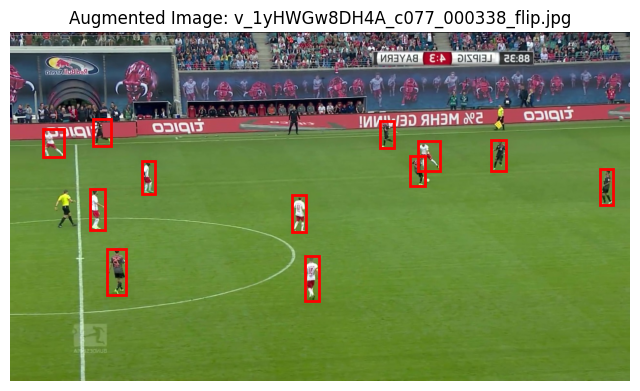

In [ ]:
image_files = os.listdir("/content/SportsMOT/preprocessed/train/images")
image_file = image_files[6]
image_path = os.path.join("/content/SportsMOT/preprocessed/train/images", image_file)
label_path = os.path.join("/content/SportsMOT/preprocessed/train/labels", image_file.replace(".jpg", ".txt"))
image, labels = load_image_and_labels(image_path, label_path)
plot_image_with_labels(image, labels, title=f"Augmented Image: {image_file}")

# **Fine Tuning Yolo Model on a Small Dataset**

To check that everything works fine we will first fine tune our yolov8 model on a smaller dataset of images(2000) and check how will be the train and validation loss and accuracy over 5 epochs.

This function creates two directories for a smaller dataset of labels and images and copies 2000 images and labels for subset of train dataset and 200 images and labels for subset of validation dataset.

In [ ]:
def create_small_dataset():
    #create directories for the small dataset
    os.makedirs("/content/SportsMOT/preprocessed/train_2000/images", exist_ok=True)
    os.makedirs("/content/SportsMOT/preprocessed/train_2000/labels", exist_ok=True)
    os.makedirs("/content/SportsMOT/preprocessed/val_200/images", exist_ok=True)
    os.makedirs( "/content/SportsMOT/preprocessed/val_200/labels", exist_ok=True)

    #get all images and labels
    all_train_images = glob(os.path.join("/content/SportsMOT/preprocessed/train/images", "*.jpg"))
    all_val_images = glob(os.path.join("/content/SportsMOT/preprocessed/val/images", "*.jpg"))


    small_train_sample = random.sample(all_train_images, 2000)
    small_val_sample = random.sample(all_val_images, 200)

    #copy training images and corresponding labels
    for img_path in small_train_sample:
        shutil.copy(img_path, "/content/SportsMOT/preprocessed/train_2000/images")
        label_path = img_path.replace("images", "labels").replace(".jpg", ".txt")
        if os.path.exists(label_path):
            shutil.copy(label_path, "/content/SportsMOT/preprocessed/train_2000/labels")

    #copy validation images and corresponding labels
    for img_path in small_val_sample:
        shutil.copy(img_path, "/content/SportsMOT/preprocessed/val_200/images")
        label_path = img_path.replace("images", "labels").replace(".jpg", ".txt")
        if os.path.exists(label_path):
            shutil.copy(label_path, "/content/SportsMOT/preprocessed/val_200/labels")


In [ ]:
create_small_dataset()

This code fine-tunes a pretrained YOLOv8 model (yolov8n.pt) on the SportsMOT dataset to detect athletes in images. It configures the dataset, trains the model for five epochs using an AdamW optimizer, and exports the final model in ONNX format for deployment.








In [ ]:

DATASET_YAML = f"""
    path: /content/SportsMOT/preprocessed
    train: {"train_2000/images"}
    val: {"val_200/images"}
    nc: 1  # Number of classes
    names: ['athlete']  # Class name
    """

with open("sportsmot.yaml", "w") as f:
        f.write(DATASET_YAML)

print("starting training...")
model = YOLO("yolov8n.pt")


results = model.train(
        data="sportsmot.yaml",
        epochs=4,
        imgsz=(1280, 720) ,
        batch=8,
        device="cuda" if torch.cuda.is_available() else "cpu",
        optimizer="AdamW",
        lr0=1e-3,
        name="sportsmot_v1",
        exist_ok=True
    )


model.export(format="onnx")
print("model saved")


starting training...


100%|██████████| 6.25M/6.25M [00:00<00:00, 165MB/s]

Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)


engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=sportsmot.yaml, epochs=4, time=None, patience=100, batch=8, imgsz=(1280, 720), save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=sportsmot_v1, exist_ok=True, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, optimize=False, int8=Fal

100%|██████████| 755k/755k [00:00<00:00, 92.5MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 259MB/s]


AMP: checks passed ✅
WARNING ⚠️ updating to 'imgsz=1280'. 'train' and 'val' imgsz must be an integer, while 'predict' and 'export' imgsz may be a [h, w] list or an integer, i.e. 'yolo export imgsz=640,480' or 'yolo export imgsz=640'


train: Scanning /content/SportsMOT/preprocessed/train_2000/labels... 2000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2000/2000 [00:01<00:00, 1831.73it/s]


train: New cache created: /content/SportsMOT/preprocessed/train_2000/labels.cache


  check_for_updates()



albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/SportsMOT/preprocessed/val_200/labels... 200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:00<00:00, 658.69it/s]

val: WARNING ⚠️ /content/SportsMOT/preprocessed/val_200/images/v_i2_L4qquVg0_c006_000494_noisy.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/SportsMOT/preprocessed/val_200/images/v_i2_L4qquVg0_c006_000610_flip.jpg: 1 duplicate labels removed


val: New cache created: /content/SportsMOT/preprocessed/val_200/labels.cache
Plotting labels to runs/detect/sportsmot_v1/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 1280 train, 1280 val
Using 2 dataloader workers
Logging results to runs/detect/sportsmot_v1
Starting training for 4 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/4       5.2G     0.8947     0.8016     0.9186        182       1280: 100%|██████████| 250/250 [02:51<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.55it/s]

                   all        200       2621      0.907      0.934      0.953      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/4      4.82G     0.7894     0.5071     0.8876        144       1280: 100%|██████████| 250/250 [02:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.10it/s]

                   all        200       2621      0.903      0.951      0.934      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/4      6.27G     0.7468     0.4568     0.8758        236       1280: 100%|██████████| 250/250 [02:48<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.52it/s]

                   all        200       2621      0.915      0.951      0.948      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/4      5.35G     0.7219      0.431     0.8699        164       1280: 100%|██████████| 250/250 [02:47<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.67it/s]

                   all        200       2621      0.913      0.953      0.948      0.775



4 epochs completed in 0.197 hours.
Optimizer stripped from runs/detect/sportsmot_v1/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/sportsmot_v1/weights/best.pt, 6.3MB

Validating runs/detect/sportsmot_v1/weights/best.pt...
Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.62it/s]


                   all        200       2621      0.913      0.953      0.948      0.775
Speed: 0.8ms preprocess, 5.8ms inference, 0.0ms loss, 5.2ms postprocess per image
Results saved to runs/detect/sportsmot_v1
Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.00GHz)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from 'runs/detect/sportsmot_v1/weights/best.pt' with input shape (1, 3, 1280, 1280) BCHW and output shape(s) (1, 5, 33600) (6.0 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 203.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.9/142.9 kB 296.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.5/291.5 MB 196.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 224.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━

## Plot of Accuracy and Loss Over Epochs for Small Dataset

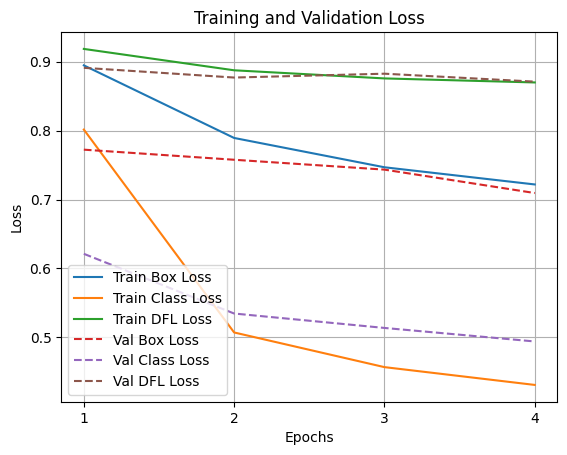

In [ ]:
df = pd.read_csv("runs/detect/sportsmot_v1/results.csv")

plt.plot(df['epoch'], df['train/box_loss'], label='Train Box Loss')
plt.plot(df['epoch'], df['train/cls_loss'], label='Train Class Loss')
plt.plot(df['epoch'], df['train/dfl_loss'], label='Train DFL Loss')
plt.plot(df['epoch'], df['val/box_loss'], label='Val Box Loss', linestyle='--')
plt.plot(df['epoch'], df['val/cls_loss'], label='Val Class Loss', linestyle='--')
plt.plot(df['epoch'], df['val/dfl_loss'], label='Val DFL Loss', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.xticks(df['epoch'].astype(int))
plt.legend()
plt.grid(True)
plt.show()

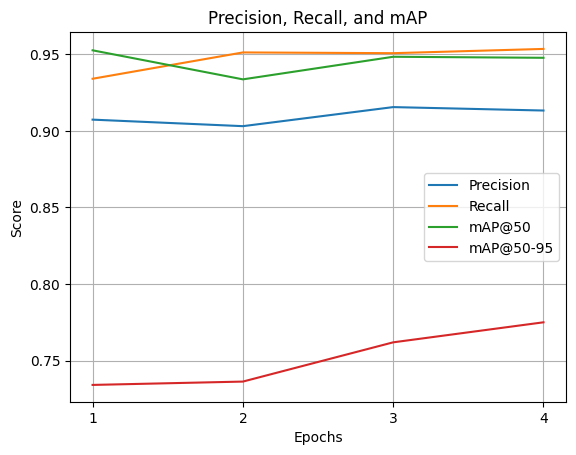

In [ ]:
plt.plot(df['epoch'], df['metrics/precision(B)'], label='Precision')
plt.plot(df['epoch'], df['metrics/recall(B)'], label='Recall')
plt.plot(df['epoch'], df['metrics/mAP50(B)'], label='mAP@50')
plt.plot(df['epoch'], df['metrics/mAP50-95(B)'], label='mAP@50-95')

plt.xlabel('Epochs')
plt.ylabel('Score')
plt.title('Precision, Recall, and mAP')
plt.xticks(df['epoch'].astype(int))
plt.legend()
plt.grid(True)
plt.show()

The model is working well so we will remove it and fine-tune the model using all images of dataset.

The code below is just for removing all things related to previous yolo model

In [ ]:
runs_folder = "/content/runs"
shutil.rmtree("/content/runs"  )
print(f"Removed {runs_folder} and its contents.")

# **Fine-Tuning YOLO Model on the Entire Dataset**

In [ ]:
DATASET_YAML = f"""
    path: /content/SportsMOT/preprocessed
    train: {"train/images"}
    val: {"val/images"}
    nc: 1  # Number of classes
    names: ['athlete']  # Class name
    """

with open("sportsmot.yaml", "w") as f:
        f.write(DATASET_YAML)

print("starting training...")
model = YOLO("yolov8n.pt")


results = model.train(
        data="sportsmot.yaml",
        epochs=3,
        imgsz=1280,
        batch=4,
        device="cuda" if torch.cuda.is_available() else "cpu",
        optimizer="AdamW",
        lr0=1e-3,
        name="sportsmot_v1",
        exist_ok=True,
        save_period=1
    )


model.export(format="onnx")
print("model saved")
#saving the model
shutil.make_archive('yolo_model', 'zip', 'runs/detect/sportsmot_v1')
files.download('yolo_model.zip')

starting training...


100%|██████████| 6.25M/6.25M [00:00<00:00, 66.0MB/s]


Ultralytics 8.3.70 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=sportsmot.yaml, epochs=3, time=None, patience=100, batch=4, imgsz=1280, save=True, save_period=1, cache=False, device=cuda, workers=8, project=None, name=sportsmot_v1, exist_ok=True, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, 

100%|██████████| 755k/755k [00:00<00:00, 23.2MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 93.5MB/s]


AMP: checks passed ✅


train: Scanning /content/SportsMOT/preprocessed/train/labels... 33339 images, 0 backgrounds, 0 corrupt: 100%|██████████| 33339/33339 [01:22<00:00, 401.97it/s]


train: New cache created: /content/SportsMOT/preprocessed/train/labels.cache


  check_for_updates()



albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/SportsMOT/preprocessed/val/labels... 27174 images, 0 backgrounds, 0 corrupt: 100%|██████████| 27174/27174 [01:06<00:00, 409.76it/s] 

val: WARNING ⚠️ /content/SportsMOT/preprocessed/val/images/v_i2_L4qquVg0_c006_000456.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/SportsMOT/preprocessed/val/images/v_i2_L4qquVg0_c006_000456_flip.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/SportsMOT/preprocessed/val/images/v_i2_L4qquVg0_c006_000456_noisy.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/SportsMOT/preprocessed/val/images/v_i2_L4qquVg0_c006_000462.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/SportsMOT/preprocessed/val/images/v_i2_L4qquVg0_c006_000462_flip.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/SportsMOT/preprocessed/val/images/v_i2_L4qquVg0_c006_000462_noisy.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/SportsMOT/preprocessed/val/images/v_i2_L4qquVg0_c006_000475.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/SportsMOT/preprocessed/val/images/v_i2_L4qquVg0_c006_000475_flip.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/SportsMOT/pr

val: New cache created: /content/SportsMOT/preprocessed/val/labels.cache
Plotting labels to runs/detect/sportsmot_v1/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 1280 train, 1280 val
Using 2 dataloader workers
Logging results to runs/detect/sportsmot_v1
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3      3.48G     0.7567     0.4691      0.879         70       1280: 100%|██████████| 8335/8335 [45:15<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3397/3397 [09:28<00:00,  5.97it/s]


                   all      27174     351072      0.912      0.951      0.943      0.784

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3      2.93G     0.6652     0.3601     0.8539         72       1280: 100%|██████████| 8335/8335 [44:15<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3397/3397 [09:47<00:00,  5.78it/s]


                   all      27174     351072      0.915      0.951       0.95        0.8

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3       3.3G      0.628     0.3257     0.8442         68       1280: 100%|██████████| 8335/8335 [44:40<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3397/3397 [09:43<00:00,  5.82it/s]


                   all      27174     351072      0.927      0.944      0.958       0.81

3 epochs completed in 2.723 hours.
Optimizer stripped from runs/detect/sportsmot_v1/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/sportsmot_v1/weights/best.pt, 6.3MB

Validating runs/detect/sportsmot_v1/weights/best.pt...
Ultralytics 8.3.70 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3397/3397 [09:47<00:00,  5.78it/s]


                   all      27174     351072      0.927      0.944      0.958       0.81
Speed: 0.9ms preprocess, 5.4ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/sportsmot_v1
Ultralytics 8.3.70 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.00GHz)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from 'runs/detect/sportsmot_v1/weights/best.pt' with input shape (1, 3, 1280, 1280) BCHW and output shape(s) (1, 5, 33600) (6.0 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 187.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.9/142.9 kB 193.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.5/291.5 MB 179.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 229.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Plot of Accuracy and Loss Over Epochs for Entire Dataset

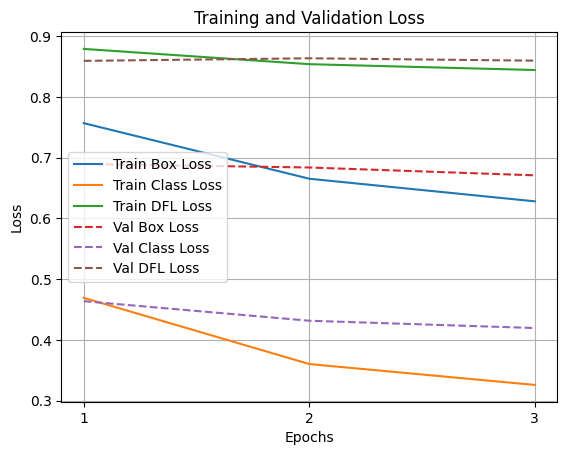

In [ ]:
df = pd.read_csv("runs/detect/sportsmot_v1/results.csv")

plt.plot(df['epoch'], df['train/box_loss'], label='Train Box Loss')
plt.plot(df['epoch'], df['train/cls_loss'], label='Train Class Loss')
plt.plot(df['epoch'], df['train/dfl_loss'], label='Train DFL Loss')
plt.plot(df['epoch'], df['val/box_loss'], label='Val Box Loss', linestyle='--')
plt.plot(df['epoch'], df['val/cls_loss'], label='Val Class Loss', linestyle='--')
plt.plot(df['epoch'], df['val/dfl_loss'], label='Val DFL Loss', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.xticks(df['epoch'].astype(int))
plt.legend()
plt.grid(True)
plt.show()

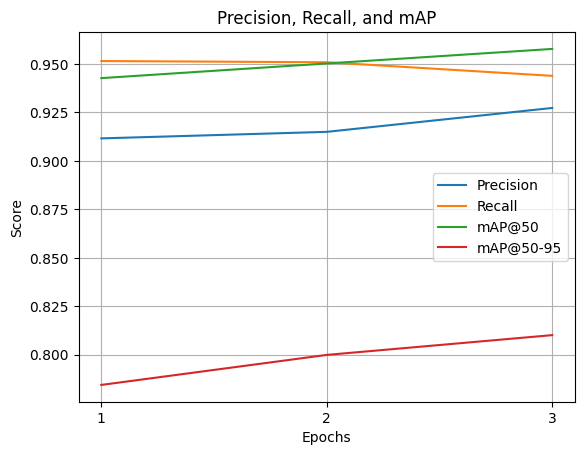

In [ ]:
plt.plot(df['epoch'], df['metrics/precision(B)'], label='Precision')
plt.plot(df['epoch'], df['metrics/recall(B)'], label='Recall')
plt.plot(df['epoch'], df['metrics/mAP50(B)'], label='mAP@50')
plt.plot(df['epoch'], df['metrics/mAP50-95(B)'], label='mAP@50-95')

plt.xlabel('Epochs')
plt.ylabel('Score')
plt.title('Precision, Recall, and mAP')
plt.xticks(df['epoch'].astype(int))
plt.legend()
plt.grid(True)
plt.show()

WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.
Loading best.onnx for ONNX Runtime inference...
Using ONNX Runtime CUDAExecutionProvider

image 1/1 /content/SportsMOT/preprocessed/val/images/v_2QhNRucNC7E_c017_000010.jpg: 1280x1280 19 athletes, 29.1ms
Speed: 13.9ms preprocess, 29.1ms inference, 1.9ms postprocess per image at shape (1, 3, 1280, 1280)

image 1/1 /content/SportsMOT/preprocessed/val/images/v_2QhNRucNC7E_c017_000030.jpg: 1280x1280 19 athletes, 36.3ms
Speed: 32.4ms preprocess, 36.3ms inference, 2.8ms postprocess per image at shape (1, 3, 1280, 1280)

image 1/1 /content/SportsMOT/preprocessed/val/images/v_2QhNRucNC7E_c017_000050.jpg: 1280x1280 19 athletes, 28.8ms
Speed: 11.1ms preprocess, 28.8ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)

image 1/1 /content/SportsMOT/preprocessed/val/images/v_2QhNRucNC7E_c017_000070.jpg: 1280x1

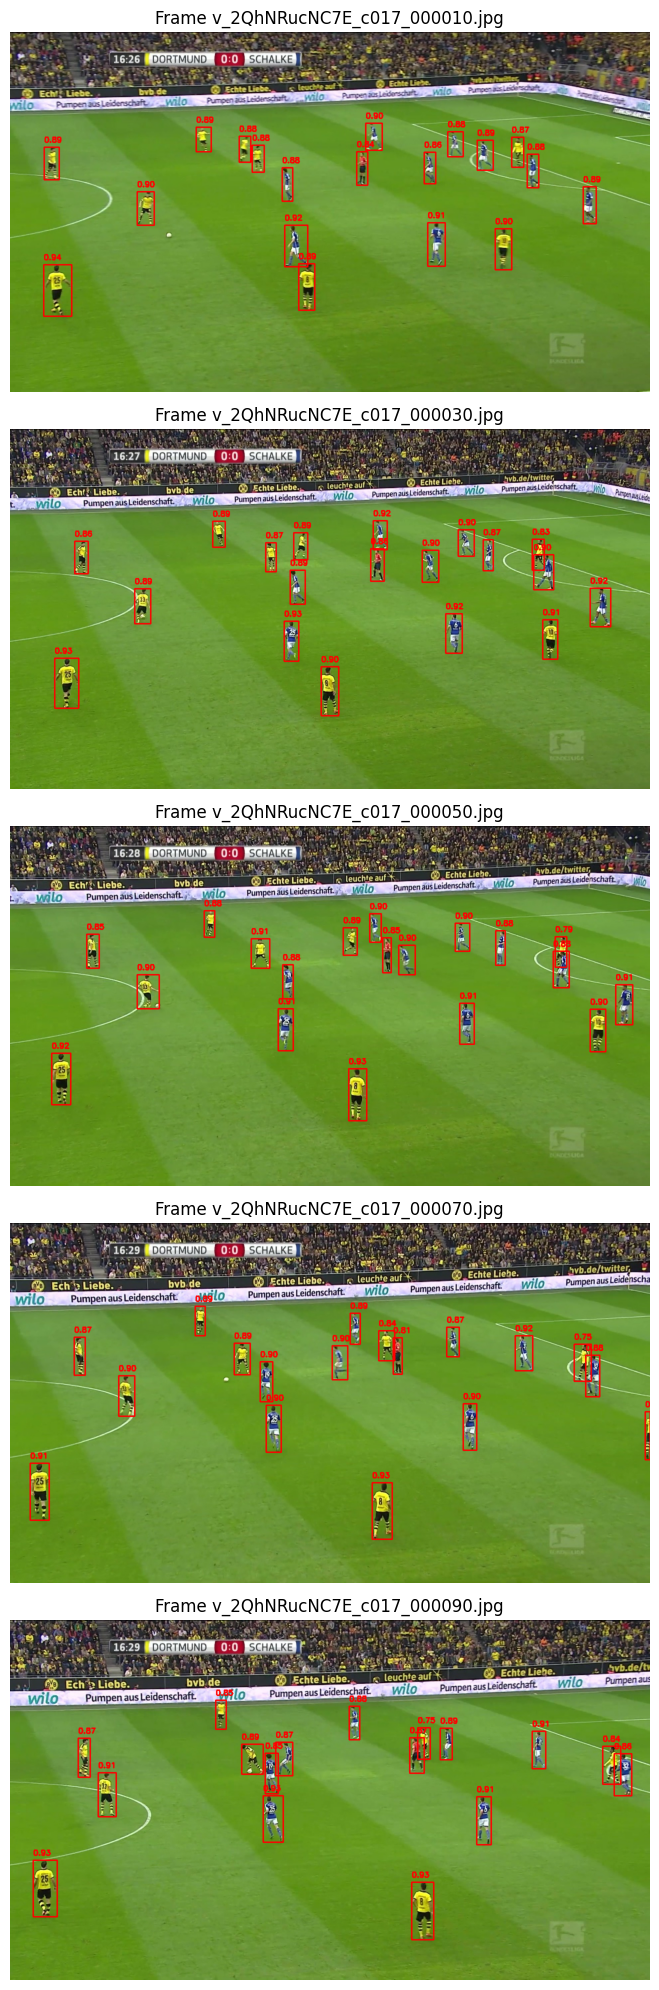

In [ ]:
model = YOLO("best.onnx")
image_filenames = [
    "v_2QhNRucNC7E_c017_000010.jpg",
    "v_2QhNRucNC7E_c017_000030.jpg",
    "v_2QhNRucNC7E_c017_000050.jpg",
    "v_2QhNRucNC7E_c017_000070.jpg",
    "v_2QhNRucNC7E_c017_000090.jpg",
]

plt.figure(figsize=(10, 20))
for i, img_filename in enumerate(image_filenames):
    img_path = os.path.join("/content/SportsMOT/preprocessed/val/images/", img_filename)
    results = model.predict(img_path,imgsz=1280)

    img = cv2.imread(img_path)
    for result in results[0].boxes:
        x1, y1, x2, y2 = result.xyxy[0].int().tolist()
        confidence = result.conf[0].item()
        #draw the bounding box
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), 2)
        #draw the confidence score as label
        label = f"{confidence:.2f}"
        cv2.putText(img, label, (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

    # cnvert image from BGR to RGB for matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(len(image_filenames), 1, i + 1)
    plt.imshow(img_rgb)
    plt.title(f"Frame {img_filename}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# **Single Object Tracking**

The first step in object tracking is detection.We will use the yolo model that we have trained before for this case.

The below function uses a YOLO model to detect players in an image, filtering out low-confidence (<0.7) and very small detections. It returns the bounding box of a specific player (player_index).







In [ ]:
model = YOLO("/content/best.onnx")

def detect_initial_bbox(img, player_index=0):
    results = model.predict(source=img, imgsz=1280)
    boxes = []

    for box in results[0].boxes:
            if float(box.conf.cpu().item()) < 0.7:
                continue
            xyxy = box.xyxy.cpu().numpy()[0].astype(int)
            x1, y1, x2, y2 = xyxy
            width = x2 - x1
            height = y2 - y1
            if width < 5 or height < 5:
                continue
            boxes.append((x1, y1, width, height))
    return boxes[player_index]

WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.


In [ ]:
!pip install onnxruntime


In [ ]:
!pip install --upgrade opencv-contrib-python

Here we apply detection on the first frame and select one of objects to track(i have used CSRT tracking).Then create a video according to project description(720p) and 25fps.

In [ ]:
#list of frames from validation data
img_files = sorted([f for f in os.listdir("/content/SportsMOT/sportsmot_publish/dataset/val/v_ITo3sCnpw_k_c007/img1/") if f.endswith('.jpg')])

# Load the first frame and perform object detection on it
first_frame_path = os.path.join("/content/SportsMOT/sportsmot_publish/dataset/val/v_ITo3sCnpw_k_c007/img1/", img_files[0])
frame = cv2.imread(first_frame_path)
init_bbox = detect_initial_bbox(frame,player_index=1)


#initialize CSRT tracker with the first frame and detected bounding box
tracker = cv2.legacy.TrackerCSRT_create()
tracker.init(frame, init_bbox)

#making video
frame_h, frame_w = frame.shape[:2]
out_writer = cv2.VideoWriter(
        "single_tracking_output.avi",
        cv2.VideoWriter_fourcc(*"XVID"),
        25.0,#frame rate
        (frame_w, frame_h)
    )

Loading /content/best.onnx for ONNX Runtime inference...
WARNING ⚠️ Failed to start ONNX Runtime with CUDA. Using CPU...
Using ONNX Runtime CPUExecutionProvider

0: 1280x1280 14 athletes, 1495.9ms
Speed: 125.9ms preprocess, 1495.9ms inference, 50.3ms postprocess per image at shape (1, 3, 1280, 1280)


In the code below we update our tracker by each frame and draw the bounding boxes according to that and add that frame to the video.

In [ ]:
tracked_frames = []
for img_name in img_files:
        img_path = os.path.join("/content/SportsMOT/sportsmot_publish/dataset/val/v_ITo3sCnpw_k_c007/img1/", img_name)
        frame = cv2.imread(img_path)

        #update the tracker with the current frame
        success, bbox = tracker.update(frame)
        if success:
            x, y, w, h = [int(v) for v in bbox]

            #draw the tracking bounding box
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 2)
            cv2.putText(
                frame, "Tracking", (x, y - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2
            )


        #save the frame to the output video
        tracked_frames.append(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        out_writer.write(frame)

out_writer.release()
print("Tracking video saved as tracking_output.avi")


Tracking video saved as tracking_output.avi


This just converts video to gif

In [ ]:
clip = VideoFileClip("single_tracking_output.avi")
clip = clip.resize(height=480)
clip = clip.set_fps(10)
clip.write_gif("single_tracking_output.gif")

MoviePy - Building file tracking_output.gif with imageio.


In [ ]:
import cv2
video = cv2.VideoCapture("single_tracking_output.avi")
width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
print(f"Resolution: {width}x{height}")
fps = video.get(cv2.CAP_PROP_FPS)
print(f"Frame Rate: {fps} FPS")
video.release()


Resolution: 1280x720
Frame Rate: 25.0 FPS


It is obvious that our tracking has a huge error when the target is not in the frame anymore.This will cause low accuracy scores in evaluation.

## Evaluation

This code calculates the Intersection over Union (IoU) between two bounding boxes, boxA and boxB. It computes the area of intersection, the areas of both boxes, and returns the IoU value to measure their overlap.

In [ ]:
def compute_iou(boxA, boxB):
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[0] + boxA[2], boxB[0] + boxB[2])
    yB = min(boxA[1] + boxA[3], boxB[1] + boxB[3])
    interArea = max(0, xB - xA) * max(0, yB - yA)
    boxAArea = boxA[2] * boxA[3]
    boxBArea = boxB[2] * boxB[3]

    iou = interArea / float(boxAArea + boxBArea - interArea + 1e-6)
    return iou

This code calculates the Euclidean distance between the centers of two bounding boxes, boxA and boxB, to measure their center error.

In [ ]:
def compute_center_error(boxA, boxB):
    centerA = (boxA[0] + boxA[2] / 2, boxA[1] + boxA[3] / 2)
    centerB = (boxB[0] + boxB[2] / 2, boxB[1] + boxB[3] / 2)
    error = np.sqrt((centerA[0] - centerB[0])**2 + (centerA[1] - centerB[1])**2)
    return error

This code evaluates the tracking performance of a given object in a video sequence by comparing predicted bounding boxes with ground truth boxes. It initializes a tracker on the first frame, then tracks the object through each subsequent frame while calculating Intersection over Union (IoU) and center error for each prediction. The results are aggregated to compute average IoU, average center error, and a success rate based on an IoU threshold of 0.5. Finally, it prints out the tracking evaluation metrics, including the number of evaluated frames, average IoU, average center error, and success rate.

In [ ]:
gt_file = "/content/SportsMOT/sportsmot_publish/dataset/val/v_ITo3sCnpw_k_c007/gt/gt.txt"

#read the ground truth file.
gt_df = pd.read_csv("/content/SportsMOT/sportsmot_publish/dataset/val/v_ITo3sCnpw_k_c007/gt/gt.txt", header=None,
                    names=['frame', 'id', 'x', 'y', 'w', 'h', 'f1', 'f2', 'f3'])

#select the ground truth for a given target id
target_id = 1
gt_df_target = gt_df[gt_df['id'] == target_id].copy()

#create a dictionary mapping frame number (int) to bounding box (x, y, w, h)
gt_dict = {}
for _, row in gt_df_target.iterrows():
    frame_num = int(row['frame'])
    bbox = (row['x'], row['y'], row['w'], row['h'])
    gt_dict[frame_num] = bbox


img_files = sorted([f for f in os.listdir("/content/SportsMOT/sportsmot_publish/dataset/val/v_ITo3sCnpw_k_c007/img1/") if f.endswith('.jpg')])
first_frame_path = os.path.join("/content/SportsMOT/sportsmot_publish/dataset/val/v_ITo3sCnpw_k_c007/img1/", img_files[0])
frame = cv2.imread(first_frame_path)
init_bbox = detect_initial_bbox(frame, player_index=4)
tracker = cv2.legacy.TrackerCSRT_create()
tracker.init(frame, init_bbox)
ious = []
center_errors = []
evaluated_frames = []
for img_name in tqdm(img_files, desc="Evaluating Tracking"):
    frame_num = int(os.path.splitext(img_name)[0])
    img_path = os.path.join("/content/SportsMOT/sportsmot_publish/dataset/val/v_ITo3sCnpw_k_c007/img1/", img_name)
    frame = cv2.imread(img_path)
    success, pred_bbox = tracker.update(frame)
    if not success:
        ious.append(0)
        center_errors.append(float('inf'))
        evaluated_frames.append(frame_num)
        continue
    if frame_num not in gt_dict:
        continue

    gt_bbox = gt_dict[frame_num]
    iou = compute_iou(pred_bbox, gt_bbox)
    center_err = compute_center_error(pred_bbox, gt_bbox)

    ious.append(iou)
    center_errors.append(center_err)
    evaluated_frames.append(frame_num)



#calculate aggregated metrics
if ious:
    avg_iou = np.mean(ious)
    avg_center_error = np.mean(center_errors)

    #compute success rate with an IoU threshold
    iou_threshold = 0.5
    success_rate = np.sum(np.array(ious) > iou_threshold) / len(ious)
else:
    avg_iou = 0
    avg_center_error = 0
    success_rate = 0


print("\n=== Tracking Evaluation Metrics ===")
print(f"Number of evaluated frames: {len(evaluated_frames)}")
print(f"Average IoU: {avg_iou:.4f}")
print(f"Average Center Error (pixels): {avg_center_error:.2f}")
print(f"Success Rate (IoU > {iou_threshold}): {success_rate * 100:.2f}%")



0: 1280x1280 14 athletes, 567.6ms
Speed: 21.8ms preprocess, 567.6ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Evaluating Tracking: 100%|██████████| 701/701 [00:34<00:00, 20.27it/s]


=== Tracking Evaluation Metrics ===
Number of evaluated frames: 389
Average IoU: 0.1638
Average Center Error (pixels): inf
Success Rate (IoU > 0.5): 23.65%


As we discussed before becuase of the  huge error in our tracker which was staying even when object is out of frame,caused a very low accuracy in evaluation part.

## HeatMap


0: 1280x1280 14 athletes, 29.6ms
Speed: 11.3ms preprocess, 29.6ms inference, 2.2ms postprocess per image at shape (1, 3, 1280, 1280)
Heatmap saved as 'heatmap.png' and overlay as 'heatmap_overlay.png'.


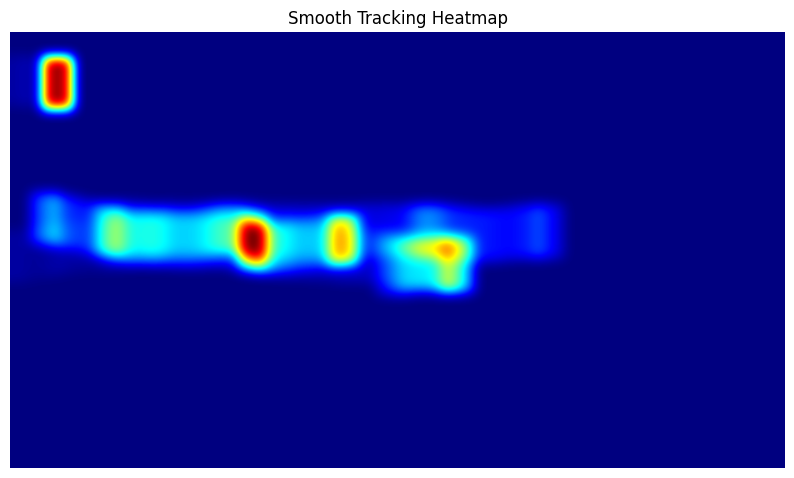

In [ ]:
first_frame_path = os.path.join("/content/SportsMOT/sportsmot_publish/dataset/val/v_ITo3sCnpw_k_c007/img1/", img_files[0])
frame = cv2.imread(first_frame_path)
init_bbox = detect_initial_bbox(frame, player_index=1)

# Initialize CSRT tracker
tracker = cv2.legacy.TrackerCSRT_create()
tracker.init(frame, init_bbox)

frame_h, frame_w = frame.shape[:2]

# Initialize heatmap
heatmap = np.zeros((frame_h, frame_w), dtype=np.float32)

# Process frames
for img_name in img_files:
    img_path = os.path.join("/content/SportsMOT/sportsmot_publish/dataset/val/v_ITo3sCnpw_k_c007/img1/", img_name)
    frame = cv2.imread(img_path)

    success, bbox = tracker.update(frame)
    if success:
        x, y, w, h = [int(v) for v in bbox]

        # Define a weight mask with a Gaussian distribution for smooth heat contribution
        mask = np.zeros((frame_h, frame_w), dtype=np.float32)
        x1, y1 = max(x, 0), max(y, 0)
        x2, y2 = min(x + w, frame_w), min(y + h, frame_h)

        mask[y1:y2, x1:x2] = 1  # Mark the bounding box area
        mask = cv2.GaussianBlur(mask, (51, 51), 10)  # Apply Gaussian smoothing

        # Accumulate the weighted heatmap
        heatmap += mask

# Normalize heatmap
heatmap_norm = cv2.normalize(heatmap, None, 0, 255, cv2.NORM_MINMAX)
heatmap_uint8 = heatmap_norm.astype(np.uint8)

# Apply colormap
heatmap_colored = cv2.applyColorMap(heatmap_uint8, cv2.COLORMAP_JET)

# Overlay heatmap on last frame
overlay = cv2.addWeighted(frame, 0.5, heatmap_colored, 0.5, 0)

# Save heatmap images
cv2.imwrite("heatmap.png", heatmap_colored)
cv2.imwrite("heatmap_overlay.png", overlay)

print("Heatmap saved as 'heatmap.png' and overlay as 'heatmap_overlay.png'.")

# Display heatmap
plt.figure(figsize=(10, 6))
plt.title("Smooth Tracking Heatmap")
plt.imshow(cv2.cvtColor(heatmap_colored, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

As we can see heatmap shows that most of the time tracker is stable after target is not in the frame anymore.

In [ ]:
import shutil

img_dir = "/content/SportsMOT/sportsmot_publish/dataset/val/v_ITo3sCnpw_k_c007/img1/"
gt_file = "/content/SportsMOT/sportsmot_publish/dataset/val/v_ITo3sCnpw_k_c007/gt/gt.txt"
output_zip = "/content/sportsmot_data.zip"

shutil.make_archive("/content/sportsmot_data", 'zip', "/content/SportsMOT/sportsmot_publish/dataset/val/v_ITo3sCnpw_k_c007/")

print("Zipping completed! File saved as:", output_zip)
from google.colab import files
files.download("/content/sportsmot_data.zip")


# **Multiple Object Tracking**

# **1.ByteTrack**

The Track class represents an object being tracked using a Kalman filter, which helps predict and smooth its motion over time. It initializes with a unique track_id and bounding box (bbox), updates its state with new detections, and predicts the object's next position when no detection is available.

In [ ]:
class Track:
    def __init__(self, track_id, bbox):
        self.track_id = track_id
        self.bbox = bbox  # [x1, y1, x2, y2]
        self.kalman = cv2.KalmanFilter(6, 4)
        self.kalman.transitionMatrix = np.array([
            [1,0,0,0,1,0], [0,1,0,0,0,1], [0,0,1,0,0,0],
            [0,0,0,1,0,0], [0,0,0,0,1,0], [0,0,0,0,0,1]
        ], dtype=np.float32)
        self.kalman.measurementMatrix = np.array([
            [1,0,0,0,0,0], [0,1,0,0,0,0], [0,0,1,0,0,0], [0,0,0,1,0,0]
        ], dtype=np.float32)
        x1, y1, x2, y2 = bbox
        self.kalman.statePost = np.array([x1, y1, x2-x1, y2-y1, 0, 0], dtype=np.float32).reshape(-1,1)
        self.time_since_update = 0
        self.hits = 1

    def predict(self):
        self.kalman.predict()
        self.time_since_update += 1

    def update(self, bbox):
        x1, y1, x2, y2 = bbox
        measurement = np.array([x1, y1, x2-x1, y2-y1], dtype=np.float32).reshape(-1,1)
        self.kalman.correct(measurement)
        self.time_since_update = 0
        self.hits += 1

    def get_state(self):
        x1 = int(self.kalman.statePost[0][0])
        y1 = int(self.kalman.statePost[1][0])
        w = int(self.kalman.statePost[2][0])
        h = int(self.kalman.statePost[3][0])
        return [x1, y1, x1+w, y1+h]

The compute_iou function calculates the Intersection over Union (IoU) between two bounding boxes. It finds the overlapping area (intersection) and divides it by the total combined area of both boxes (union), ensuring numerical stability by adding a small constant (1e-8) to avoid division by zero.

In [ ]:
def compute_iou(box1, box2):
    x1, y1, x2, y2 = box1
    a1, b1, a2, b2 = box2
    inter = max(0, min(x2, a2) - max(x1, a1)) * max(0, min(y2, b2) - max(y1, b1))
    area1 = (x2 - x1) * (y2 - y1)
    area2 = (a2 - a1) * (b2 - b1)
    return inter / (area1 + area2 - inter + 1e-8)

This function is very similar to detect_initial_bbox we implemented in last part.

In [ ]:
def detect_objects(frame):
    results = model.predict(source=frame, imgsz=1280)
    boxes = []
    confs = []
    if results[0].boxes is not None:
        for box in results[0].boxes:
            conf = float(box.conf.cpu().item())
            if float(box.conf.cpu().item()) < 0.2:
                continue
            xyxy = box.xyxy.cpu().numpy()[0].astype(int)
            boxes.append(xyxy)
            confs.append(conf)
    return np.array(boxes), np.array(confs)

This function matches detected objects with existing tracked objects using IoU similarity and the Hungarian Algorithm. It computes a cost matrix (1 - IoU) and finds optimal assignments to minimize the cost. If the IoU of a match is above a threshold , it is considered valid. Unmatched detections and tracks are tracked separately for handling new and lost objects. This approach ensures efficient and accurate tracking in object detection and tracking pipelines.

In [ ]:
def match_tracks_and_detections(tracks, detections):
    if len(tracks) == 0 or len(detections) == 0:
        return [], list(range(len(detections))), list(range(len(tracks)))

    cost_matrix = np.zeros((len(tracks), len(detections)))
    for i, track in enumerate(tracks):
        for j, detection in enumerate(detections):
            cost_matrix[i, j] = 1 - compute_iou(track.get_state(), detection)

    row_ind, col_ind = linear_sum_assignment(cost_matrix)
    matched = []
    unmatched_tracks = list(range(len(tracks)))
    unmatched_detections = list(range(len(detections)))
    for r, c in zip(row_ind, col_ind):
        if cost_matrix[r, c] < 0.8:
            matched.append((r, c))
            unmatched_tracks.remove(r)
            unmatched_detections.remove(c)

    return matched, unmatched_detections, unmatched_tracks

The code implements object tracking using ByteTrack on a sequence of image frames. It loads sorted images, detects objects, and categorizes them into high and low-confidence groups. Tracks are predicted, matched with detections, and updated, while unmatched detections create new tracks. Stale tracks are removed based on a max_age threshold. Bounding boxes and track IDs are drawn on frames, which are then compiled into an output video ("bytetrack_output.avi"). This process effectively demonstrates multi-object tracking and video generation.

In [ ]:
zip_path = "/content/sportsmot_data.zip"
extract_dir = "/content/sportsmot_data"  # This is the folder where the archive will be extracted

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Unzipping completed! Files extracted to: {extract_dir}")
img_dir = os.path.join(extract_dir, "img1")
gt_file = os.path.join(extract_dir, "gt", "gt.txt")

Unzipping completed! Files extracted to: /content/sportsmot_data


In [ ]:
img_files = sorted([f for f in os.listdir("/content/SportsMOT/sportsmot_publish/dataset/val/v_ITo3sCnpw_k_c007/img1/") if f.endswith('.jpg')])
first_frame = cv2.imread(os.path.join("/content/SportsMOT/sportsmot_publish/dataset/val/v_ITo3sCnpw_k_c007/img1/", img_files[0]))
#open the results file for writing
results_file = open("bytetrack_results.txt", "w")

#create video
out_writer = cv2.VideoWriter("bytetrack_output.avi",
                            cv2.VideoWriter_fourcc(*"XVID"),
                            25.0, (w, h))

tracks = []
next_id = 1
max_age = 40

for img_name in img_files:
    frame = cv2.imread(os.path.join("/content/SportsMOT/sportsmot_publish/dataset/val/v_ITo3sCnpw_k_c007/img1/", img_name))
    if frame is None:
        continue
    frame_id = int(img_name.split('.')[0])

    #detection
    boxes, confs = detect_objects(frame)
    high_conf = boxes[confs >= 0.8]
    low_conf = boxes[confs < 0.8]

    #predict tracks
    for track in tracks:
        track.predict()

    # Match high-confidence detections
    matched_high, unmatched_high_detections, unmatched_tracks_high = match_tracks_and_detections(tracks, high_conf)
    for r, c in matched_high:
        tracks[r].update(high_conf[c])

    #match low-confidence detections to remaining tracks
    remaining_tracks = [tracks[i] for i in unmatched_tracks_high]
    matched_low, unmatched_low_detections, _ = match_tracks_and_detections(remaining_tracks, low_conf)
    for r, c in matched_low:
        remaining_tracks[r].update(low_conf[c])

    #create new tracks from unmatched detections
    for i in unmatched_high_detections:
        tracks.append(Track(next_id, high_conf[i]))
        next_id += 1
    for i in unmatched_low_detections:
        tracks.append(Track(next_id, low_conf[i]))
        next_id += 1

    #remove stale tracks
    tracks = [t for t in tracks if t.time_since_update <= max_age]

    #save track results in file for evaluation
    for track in tracks:
        if track.time_since_update == 0:
            x1, y1, x2, y2 = track.get_state()
            w, h = x2 - x1, y2 - y1
            track_id = track.track_id
            results_file.write(f"{frame_id},{track_id},{x1},{y1},{w},{h},1,-1,-1,-1\n")

    #draw results
    for track in tracks:
        if track.time_since_update == 0:
            x1, y1, x2, y2 = track.get_state()
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(frame, f"ID:{track.track_id}", (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    out_writer.write(frame)
results_file.close()
out_writer.release()
print("Tracking complete. Results saved in 'bytetrack_results.txt'.")



0: 1280x1280 14 athletes, 811.6ms
Speed: 21.2ms preprocess, 811.6ms inference, 1.9ms postprocess per image at shape (1, 3, 1280, 1280)

0: 1280x1280 14 athletes, 717.2ms
Speed: 14.7ms preprocess, 717.2ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)

0: 1280x1280 14 athletes, 705.9ms
Speed: 12.9ms preprocess, 705.9ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)

0: 1280x1280 14 athletes, 712.9ms
Speed: 13.3ms preprocess, 712.9ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)



KeyboardInterrupt: 

## Evaluation

In [ ]:
!pip install motmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.5/161.5 kB 4.1 MB/s eta 0:00:00


This code calculates the Intersection over Union (IoU) for two bounding boxes by finding their overlapping area and dividing it by their combined area. It handles potential divisions by zero with a small epsilon value 1e-8.

In [ ]:
def compute_iou_mot(box1, box2):
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2
    box1_xmax = x1 + w1
    box1_ymax = y1 + h1
    box2_xmax = x2 + w2
    box2_ymax = y2 + h2

    inter_x1 = max(x1, x2)
    inter_y1 = max(y1, y2)
    inter_x2 = min(box1_xmax, box2_xmax)
    inter_y2 = min(box1_ymax, box2_ymax)

    inter_area = max(0, inter_x2 - inter_x1) * max(0, inter_y2 - inter_y1)
    union_area = (w1 * h1) + (w2 * h2) - inter_area

    return inter_area / (union_area + 1e-8)

This code evaluates multi-object tracking (MOT) performance by comparing ground truth and predicted bounding boxes across frames, using IoU to create a cost matrix for frame-to-frame matching. It then calculates MOT metrics such as MOTA, IDF1, and precision using the motmetrics library.

In [ ]:
import motmetrics as mm
from scipy.optimize import linear_sum_assignment

#reading ground trurh
gt_df = pd.read_csv("/content/SportsMOT/sportsmot_publish/dataset/val/v_ITo3sCnpw_k_c007/gt/gt.txt", header=None, names=['frame', 'id', 'x', 'y', 'w', 'h', 'f1', 'f2', 'f3'])
gt_df = gt_df[['frame', 'id', 'x', 'y', 'w', 'h']]

#reading tracking predictions
pred_df = pd.read_csv("bytetrack_results.txt", header=None, names=['frame', 'id', 'x', 'y', 'w', 'h', 'score', 'd1', 'd2', 'd3'])
pred_df = pred_df[['frame', 'id', 'x', 'y', 'w', 'h']]


#setu p the MOTAccumulator
acc = mm.MOTAccumulator(auto_id=True)


all_frames = sorted(gt_df['frame'].unique())
for frame in all_frames:
    # Select all ground truth objects for this frame.
    gt_frame = gt_df[gt_df['frame'] == frame]
    gt_ids = list(gt_frame['id'].unique())

    gt_boxes = {row['id']: [row['x'], row['y'], row['w'], row['h']]
                for _, row in gt_frame.iterrows()}

    #select all predicted objects for this frame.
    pred_frame = pred_df[pred_df['frame'] == frame]
    pred_ids = list(pred_frame['id'].unique())

    #build a dictionary of predicted bounding boxes
    pred_boxes = {row['id']: [row['x'], row['y'], row['w'], row['h']]
                  for _, row in pred_frame.iterrows()}

    #if there are no detections,
    if len(pred_ids) == 0:
        acc.update(gt_ids, [], np.empty((len(gt_ids), 0)))
        continue
    if len(gt_ids) == 0:
        acc.update([], pred_ids, np.empty((0, len(pred_ids))))
        continue

    #create a cost matrix using IoU
    cost_matrix = np.zeros((len(gt_ids), len(pred_ids)), dtype=np.float32)
    for i, gt_id in enumerate(gt_ids):
        for j, pred_id in enumerate(pred_ids):
            iou = compute_iou_mot(gt_boxes[gt_id], pred_boxes[pred_id])
            cost_matrix[i, j] = 1 - iou

    acc.update(gt_ids, pred_ids, cost_matrix)



#compute mot metrics
mh = mm.metrics.create()
summary = mh.compute(
    acc,
    metrics=['mota', 'idf1', 'precision'],
    name='motmetrics'
)

print("\n=== Multi-Object Tracking Evaluation Metrics ===")
print(summary.to_string())



=== Multi-Object Tracking Evaluation Metrics ===
                mota      idf1  precision
motmetrics  0.858282  0.428452   0.913566


# **2.DeepSort**

In [ ]:
!pip install deep-sort-realtime


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 21.1 MB/s eta 0:00:00


In [ ]:
zip_path = "/content/sportsmot_data.zip"
extract_dir = "/content/sportsmot_data"  # This is the folder where the archive will be extracted

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Unzipping completed! Files extracted to: {extract_dir}")
img_dir = os.path.join(extract_dir, "img1")
gt_file = os.path.join(extract_dir, "gt", "gt.txt")

Unzipping completed! Files extracted to: /content/sportsmot_data


This code is very similar to what we did in bytetrack

In [ ]:
from deep_sort_realtime.deepsort_tracker import DeepSort

deepsort = DeepSort(max_age=30)

#read images
img_files = sorted([f for f in os.listdir(img_dir) if f.endswith('.jpg')])
first_frame_path = os.path.join(img_dir, img_files[0])
first_frame = cv2.imread(first_frame_path)
h, w = first_frame.shape[:2]

# create video
out_writer = cv2.VideoWriter("deepsort_output.avi",
                             cv2.VideoWriter_fourcc(*"XVID"),
                             25.0, (w, h))
results_file = open("deepsort_results.txt", "w")

#tracking over frames
for img_name in tqdm(img_files, desc="Running DeepSort Tracking"):
    frame_path = os.path.join(img_dir, img_name)
    frame = cv2.imread(frame_path)
    if frame is None:
        continue
    frame_id = int(os.path.splitext(img_name)[0])

    #detection
    boxes, confs = detect_objects(frame)

    #prepare detections for DeepSort: convert [x1, y1, x2, y2] to [x, y, w, h]
    detections = []
    for i in range(len(boxes)):
        x1, y1, x2, y2 = boxes[i]
        conf = confs[i]
        w_box = float(x2 - x1)
        h_box = float(y2 - y1)
        detection = ([float(x1), float(y1), w_box, h_box],
                     float(conf),
                     None)
        detections.append(detection)

    #update DeepSort tracker
    tracks = deepsort.update_tracks(detections, frame=frame)

    #loop over confirmed tracks
    for track in tracks:
        if not track.is_confirmed():
            continue
        bbox = track.to_ltrb()
        track_id = track.track_id

        x1, y1, x2, y2 = [int(v) for v in bbox]
        box_w, box_h = x2 - x1, y2 - y1

        #write the tracking results in MOTChallenge format:
        results_file.write(f"{frame_id},{track_id},{x1},{y1},{box_w},{box_h},1,-1,-1,-1\n")

        #draw the bounding box and track ID
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(frame, f"ID:{track_id}", (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    out_writer.write(frame)

results_file.close()
out_writer.release()
print("DeepSort tracking complete. Results saved in 'deepsort_results.txt' and video in 'deepsort_output.avi'.")


Running DeepSort Tracking:   0%|          | 0/701 [00:00<?, ?it/s]

Loading /content/best.onnx for ONNX Runtime inference...
Using ONNX Runtime CPUExecutionProvider

0: 1280x1280 14 athletes, 1970.4ms
Speed: 42.9ms preprocess, 1970.4ms inference, 2.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:   0%|          | 1/701 [00:03<38:13,  3.28s/it]


0: 1280x1280 14 athletes, 1019.0ms
Speed: 15.1ms preprocess, 1019.0ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:   0%|          | 2/701 [00:05<28:49,  2.47s/it]


0: 1280x1280 14 athletes, 707.4ms
Speed: 13.1ms preprocess, 707.4ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:   0%|          | 3/701 [00:06<23:35,  2.03s/it]


0: 1280x1280 14 athletes, 728.6ms
Speed: 12.2ms preprocess, 728.6ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:   1%|          | 4/701 [00:08<21:14,  1.83s/it]


0: 1280x1280 14 athletes, 715.0ms
Speed: 12.8ms preprocess, 715.0ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:   1%|          | 5/701 [00:09<19:51,  1.71s/it]


0: 1280x1280 13 athletes, 711.9ms
Speed: 14.5ms preprocess, 711.9ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:   1%|          | 6/701 [00:11<18:27,  1.59s/it]


0: 1280x1280 12 athletes, 710.7ms
Speed: 12.0ms preprocess, 710.7ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:   1%|          | 7/701 [00:12<17:19,  1.50s/it]


0: 1280x1280 15 athletes, 711.6ms
Speed: 11.9ms preprocess, 711.6ms inference, 1.9ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:   1%|          | 8/701 [00:13<17:27,  1.51s/it]


0: 1280x1280 16 athletes, 1012.0ms
Speed: 13.6ms preprocess, 1012.0ms inference, 2.2ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:   1%|▏         | 9/701 [00:16<20:33,  1.78s/it]


0: 1280x1280 14 athletes, 1078.6ms
Speed: 14.4ms preprocess, 1078.6ms inference, 2.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:   1%|▏         | 10/701 [00:18<21:17,  1.85s/it]


0: 1280x1280 15 athletes, 818.6ms
Speed: 18.2ms preprocess, 818.6ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:   2%|▏         | 11/701 [00:19<20:38,  1.79s/it]


0: 1280x1280 15 athletes, 727.6ms
Speed: 14.0ms preprocess, 727.6ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:   2%|▏         | 12/701 [00:21<19:45,  1.72s/it]


0: 1280x1280 13 athletes, 732.6ms
Speed: 18.8ms preprocess, 732.6ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:   2%|▏         | 13/701 [00:22<18:40,  1.63s/it]


0: 1280x1280 12 athletes, 716.6ms
Speed: 15.1ms preprocess, 716.6ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:   2%|▏         | 14/701 [00:24<17:31,  1.53s/it]


0: 1280x1280 13 athletes, 741.4ms
Speed: 14.2ms preprocess, 741.4ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:   2%|▏         | 15/701 [00:25<17:03,  1.49s/it]


0: 1280x1280 12 athletes, 1223.5ms
Speed: 23.3ms preprocess, 1223.5ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:   2%|▏         | 16/701 [00:27<18:10,  1.59s/it]


0: 1280x1280 11 athletes, 1010.9ms
Speed: 16.7ms preprocess, 1010.9ms inference, 2.1ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:   2%|▏         | 17/701 [00:29<18:46,  1.65s/it]


0: 1280x1280 11 athletes, 1129.8ms
Speed: 28.9ms preprocess, 1129.8ms inference, 2.2ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:   3%|▎         | 18/701 [00:31<19:43,  1.73s/it]


0: 1280x1280 11 athletes, 778.1ms
Speed: 33.9ms preprocess, 778.1ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:   3%|▎         | 19/701 [00:32<18:28,  1.63s/it]


0: 1280x1280 13 athletes, 733.2ms
Speed: 15.1ms preprocess, 733.2ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:   3%|▎         | 20/701 [00:33<17:41,  1.56s/it]


0: 1280x1280 12 athletes, 732.6ms
Speed: 13.9ms preprocess, 732.6ms inference, 2.3ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:   3%|▎         | 21/701 [00:35<16:58,  1.50s/it]


0: 1280x1280 14 athletes, 733.6ms
Speed: 14.2ms preprocess, 733.6ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:   3%|▎         | 22/701 [00:36<17:05,  1.51s/it]


0: 1280x1280 14 athletes, 788.2ms
Speed: 25.5ms preprocess, 788.2ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:   3%|▎         | 23/701 [00:38<17:08,  1.52s/it]


0: 1280x1280 15 athletes, 721.7ms
Speed: 14.0ms preprocess, 721.7ms inference, 2.0ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:   3%|▎         | 24/701 [00:39<17:12,  1.53s/it]


0: 1280x1280 15 athletes, 741.3ms
Speed: 19.1ms preprocess, 741.3ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:   4%|▎         | 25/701 [00:41<17:19,  1.54s/it]


0: 1280x1280 14 athletes, 1095.3ms
Speed: 14.7ms preprocess, 1095.3ms inference, 2.0ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:   4%|▎         | 26/701 [00:43<19:10,  1.70s/it]


0: 1280x1280 13 athletes, 1117.1ms
Speed: 15.3ms preprocess, 1117.1ms inference, 2.3ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:   4%|▍         | 27/701 [00:45<19:38,  1.75s/it]


0: 1280x1280 16 athletes, 730.7ms
Speed: 14.9ms preprocess, 730.7ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:   4%|▍         | 28/701 [00:47<19:35,  1.75s/it]


0: 1280x1280 14 athletes, 730.5ms
Speed: 16.1ms preprocess, 730.5ms inference, 2.3ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:   4%|▍         | 29/701 [00:48<18:34,  1.66s/it]


0: 1280x1280 14 athletes, 725.8ms
Speed: 18.3ms preprocess, 725.8ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:   4%|▍         | 30/701 [00:50<17:48,  1.59s/it]


0: 1280x1280 12 athletes, 725.8ms
Speed: 14.0ms preprocess, 725.8ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:   4%|▍         | 31/701 [00:51<16:45,  1.50s/it]


0: 1280x1280 13 athletes, 726.7ms
Speed: 14.4ms preprocess, 726.7ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:   5%|▍         | 32/701 [00:52<16:17,  1.46s/it]


0: 1280x1280 14 athletes, 782.9ms
Speed: 14.2ms preprocess, 782.9ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:   5%|▍         | 33/701 [00:54<16:32,  1.49s/it]


0: 1280x1280 13 athletes, 730.6ms
Speed: 17.9ms preprocess, 730.6ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:   5%|▍         | 34/701 [00:55<16:54,  1.52s/it]


0: 1280x1280 12 athletes, 1101.3ms
Speed: 31.7ms preprocess, 1101.3ms inference, 2.3ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:   5%|▍         | 35/701 [00:57<18:21,  1.65s/it]


0: 1280x1280 12 athletes, 917.9ms
Speed: 26.5ms preprocess, 917.9ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:   5%|▌         | 36/701 [00:59<17:57,  1.62s/it]


0: 1280x1280 14 athletes, 719.7ms
Speed: 14.6ms preprocess, 719.7ms inference, 2.2ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:   5%|▌         | 37/701 [01:00<17:24,  1.57s/it]


0: 1280x1280 14 athletes, 721.9ms
Speed: 14.2ms preprocess, 721.9ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:   5%|▌         | 38/701 [01:02<17:02,  1.54s/it]


0: 1280x1280 13 athletes, 718.4ms
Speed: 20.7ms preprocess, 718.4ms inference, 1.9ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:   6%|▌         | 39/701 [01:03<16:29,  1.50s/it]


0: 1280x1280 12 athletes, 733.9ms
Speed: 18.6ms preprocess, 733.9ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:   6%|▌         | 40/701 [01:05<16:02,  1.46s/it]


0: 1280x1280 12 athletes, 724.8ms
Speed: 14.1ms preprocess, 724.8ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:   6%|▌         | 41/701 [01:06<15:36,  1.42s/it]


0: 1280x1280 14 athletes, 715.4ms
Speed: 18.0ms preprocess, 715.4ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:   6%|▌         | 42/701 [01:08<16:40,  1.52s/it]


0: 1280x1280 13 athletes, 963.5ms
Speed: 17.9ms preprocess, 963.5ms inference, 2.2ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:   6%|▌         | 43/701 [01:10<17:52,  1.63s/it]


0: 1280x1280 15 athletes, 1106.7ms
Speed: 24.5ms preprocess, 1106.7ms inference, 2.5ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:   6%|▋         | 44/701 [01:12<19:18,  1.76s/it]


0: 1280x1280 14 athletes, 725.8ms
Speed: 14.9ms preprocess, 725.8ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:   6%|▋         | 45/701 [01:13<18:25,  1.69s/it]


0: 1280x1280 14 athletes, 715.2ms
Speed: 14.1ms preprocess, 715.2ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:   7%|▋         | 46/701 [01:15<17:40,  1.62s/it]


0: 1280x1280 13 athletes, 740.2ms
Speed: 18.8ms preprocess, 740.2ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:   7%|▋         | 47/701 [01:16<16:53,  1.55s/it]


0: 1280x1280 13 athletes, 731.2ms
Speed: 21.1ms preprocess, 731.2ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:   7%|▋         | 48/701 [01:17<16:26,  1.51s/it]


0: 1280x1280 13 athletes, 714.4ms
Speed: 13.9ms preprocess, 714.4ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:   7%|▋         | 49/701 [01:19<16:04,  1.48s/it]


0: 1280x1280 15 athletes, 720.1ms
Speed: 18.7ms preprocess, 720.1ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:   7%|▋         | 50/701 [01:20<16:13,  1.50s/it]


0: 1280x1280 13 athletes, 706.7ms
Speed: 16.2ms preprocess, 706.7ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:   7%|▋         | 51/701 [01:22<16:16,  1.50s/it]


0: 1280x1280 12 athletes, 1089.3ms
Speed: 27.9ms preprocess, 1089.3ms inference, 2.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:   7%|▋         | 52/701 [01:24<17:23,  1.61s/it]


0: 1280x1280 13 athletes, 985.5ms
Speed: 23.9ms preprocess, 985.5ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:   8%|▊         | 53/701 [01:25<17:18,  1.60s/it]


0: 1280x1280 12 athletes, 721.5ms
Speed: 17.9ms preprocess, 721.5ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:   8%|▊         | 54/701 [01:27<16:11,  1.50s/it]


0: 1280x1280 13 athletes, 729.5ms
Speed: 14.5ms preprocess, 729.5ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:   8%|▊         | 55/701 [01:28<15:34,  1.45s/it]


0: 1280x1280 13 athletes, 742.3ms
Speed: 19.0ms preprocess, 742.3ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:   8%|▊         | 56/701 [01:29<15:07,  1.41s/it]


0: 1280x1280 12 athletes, 720.5ms
Speed: 14.8ms preprocess, 720.5ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:   8%|▊         | 57/701 [01:30<14:34,  1.36s/it]


0: 1280x1280 12 athletes, 726.0ms
Speed: 13.9ms preprocess, 726.0ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:   8%|▊         | 58/701 [01:32<14:17,  1.33s/it]


0: 1280x1280 12 athletes, 729.7ms
Speed: 18.5ms preprocess, 729.7ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:   8%|▊         | 59/701 [01:33<14:03,  1.31s/it]


0: 1280x1280 12 athletes, 717.5ms
Speed: 16.4ms preprocess, 717.5ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:   9%|▊         | 60/701 [01:34<13:50,  1.30s/it]


0: 1280x1280 12 athletes, 982.8ms
Speed: 15.8ms preprocess, 982.8ms inference, 2.1ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:   9%|▊         | 61/701 [01:36<15:10,  1.42s/it]


0: 1280x1280 13 athletes, 1126.6ms
Speed: 28.4ms preprocess, 1126.6ms inference, 2.2ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:   9%|▉         | 62/701 [01:38<16:48,  1.58s/it]


0: 1280x1280 14 athletes, 739.3ms
Speed: 15.6ms preprocess, 739.3ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:   9%|▉         | 63/701 [01:39<16:17,  1.53s/it]


0: 1280x1280 13 athletes, 732.9ms
Speed: 15.6ms preprocess, 732.9ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:   9%|▉         | 64/701 [01:41<15:34,  1.47s/it]


0: 1280x1280 13 athletes, 728.6ms
Speed: 14.5ms preprocess, 728.6ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:   9%|▉         | 65/701 [01:42<14:59,  1.41s/it]


0: 1280x1280 13 athletes, 734.1ms
Speed: 14.1ms preprocess, 734.1ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:   9%|▉         | 66/701 [01:43<14:41,  1.39s/it]


0: 1280x1280 13 athletes, 723.0ms
Speed: 15.5ms preprocess, 723.0ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  10%|▉         | 67/701 [01:45<14:25,  1.37s/it]


0: 1280x1280 13 athletes, 726.0ms
Speed: 16.0ms preprocess, 726.0ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  10%|▉         | 68/701 [01:46<14:11,  1.35s/it]


0: 1280x1280 13 athletes, 737.9ms
Speed: 13.9ms preprocess, 737.9ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  10%|▉         | 69/701 [01:47<14:02,  1.33s/it]


0: 1280x1280 13 athletes, 771.0ms
Speed: 19.6ms preprocess, 771.0ms inference, 2.3ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  10%|▉         | 70/701 [01:49<14:46,  1.40s/it]


0: 1280x1280 13 athletes, 1094.0ms
Speed: 25.8ms preprocess, 1094.0ms inference, 2.0ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  10%|█         | 71/701 [01:51<16:14,  1.55s/it]


0: 1280x1280 11 athletes, 863.5ms
Speed: 19.8ms preprocess, 863.5ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  10%|█         | 72/701 [01:52<15:30,  1.48s/it]


0: 1280x1280 12 athletes, 734.5ms
Speed: 16.5ms preprocess, 734.5ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  10%|█         | 73/701 [01:53<14:46,  1.41s/it]


0: 1280x1280 12 athletes, 731.9ms
Speed: 14.0ms preprocess, 731.9ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  11%|█         | 74/701 [01:54<14:16,  1.37s/it]


0: 1280x1280 14 athletes, 721.8ms
Speed: 21.4ms preprocess, 721.8ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  11%|█         | 75/701 [01:56<14:23,  1.38s/it]


0: 1280x1280 12 athletes, 723.5ms
Speed: 14.2ms preprocess, 723.5ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  11%|█         | 76/701 [01:57<13:58,  1.34s/it]


0: 1280x1280 13 athletes, 734.8ms
Speed: 14.4ms preprocess, 734.8ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  11%|█         | 77/701 [01:58<13:57,  1.34s/it]


0: 1280x1280 14 athletes, 725.5ms
Speed: 17.1ms preprocess, 725.5ms inference, 2.3ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  11%|█         | 78/701 [02:00<14:13,  1.37s/it]


0: 1280x1280 12 athletes, 718.4ms
Speed: 14.7ms preprocess, 718.4ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  11%|█▏        | 79/701 [02:01<13:50,  1.34s/it]


0: 1280x1280 13 athletes, 1072.4ms
Speed: 14.7ms preprocess, 1072.4ms inference, 2.0ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  11%|█▏        | 80/701 [02:03<15:30,  1.50s/it]


0: 1280x1280 15 athletes, 1109.2ms
Speed: 32.5ms preprocess, 1109.2ms inference, 2.2ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  12%|█▏        | 81/701 [02:05<16:56,  1.64s/it]


0: 1280x1280 14 athletes, 725.6ms
Speed: 18.1ms preprocess, 725.6ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  12%|█▏        | 82/701 [02:06<16:14,  1.57s/it]


0: 1280x1280 14 athletes, 728.2ms
Speed: 18.1ms preprocess, 728.2ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  12%|█▏        | 83/701 [02:08<15:40,  1.52s/it]


0: 1280x1280 13 athletes, 727.9ms
Speed: 14.0ms preprocess, 727.9ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  12%|█▏        | 84/701 [02:09<14:59,  1.46s/it]


0: 1280x1280 13 athletes, 739.5ms
Speed: 16.9ms preprocess, 739.5ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  12%|█▏        | 85/701 [02:10<14:36,  1.42s/it]


0: 1280x1280 16 athletes, 730.8ms
Speed: 14.3ms preprocess, 730.8ms inference, 2.4ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  12%|█▏        | 86/701 [02:12<15:12,  1.48s/it]


0: 1280x1280 16 athletes, 740.3ms
Speed: 15.7ms preprocess, 740.3ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  12%|█▏        | 87/701 [02:14<15:43,  1.54s/it]


0: 1280x1280 14 athletes, 732.0ms
Speed: 17.6ms preprocess, 732.0ms inference, 1.9ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  13%|█▎        | 88/701 [02:15<16:06,  1.58s/it]


0: 1280x1280 14 athletes, 1101.9ms
Speed: 16.8ms preprocess, 1101.9ms inference, 3.0ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  13%|█▎        | 89/701 [02:17<17:23,  1.71s/it]


0: 1280x1280 15 athletes, 884.8ms
Speed: 29.2ms preprocess, 884.8ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  13%|█▎        | 90/701 [02:19<17:13,  1.69s/it]


0: 1280x1280 14 athletes, 733.9ms
Speed: 19.1ms preprocess, 733.9ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  13%|█▎        | 91/701 [02:21<16:26,  1.62s/it]


0: 1280x1280 20 athletes, 729.7ms
Speed: 19.3ms preprocess, 729.7ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  13%|█▎        | 92/701 [02:23<17:55,  1.77s/it]


0: 1280x1280 15 athletes, 731.7ms
Speed: 18.2ms preprocess, 731.7ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  13%|█▎        | 93/701 [02:24<16:39,  1.64s/it]


0: 1280x1280 16 athletes, 723.2ms
Speed: 14.5ms preprocess, 723.2ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  13%|█▎        | 94/701 [02:25<15:53,  1.57s/it]


0: 1280x1280 16 athletes, 722.9ms
Speed: 19.6ms preprocess, 722.9ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  14%|█▎        | 95/701 [02:27<15:20,  1.52s/it]


0: 1280x1280 16 athletes, 734.6ms
Speed: 17.2ms preprocess, 734.6ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  14%|█▎        | 96/701 [02:28<15:31,  1.54s/it]


0: 1280x1280 17 athletes, 1063.3ms
Speed: 26.7ms preprocess, 1063.3ms inference, 2.1ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  14%|█▍        | 97/701 [02:30<17:12,  1.71s/it]


0: 1280x1280 17 athletes, 1019.9ms
Speed: 24.9ms preprocess, 1019.9ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  14%|█▍        | 98/701 [02:32<18:03,  1.80s/it]


0: 1280x1280 12 athletes, 727.6ms
Speed: 14.1ms preprocess, 727.6ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  14%|█▍        | 99/701 [02:34<16:25,  1.64s/it]


0: 1280x1280 14 athletes, 727.9ms
Speed: 17.0ms preprocess, 727.9ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  14%|█▍        | 100/701 [02:35<15:41,  1.57s/it]


0: 1280x1280 15 athletes, 732.9ms
Speed: 16.1ms preprocess, 732.9ms inference, 2.2ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  14%|█▍        | 101/701 [02:37<15:23,  1.54s/it]


0: 1280x1280 17 athletes, 734.1ms
Speed: 14.6ms preprocess, 734.1ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  15%|█▍        | 102/701 [02:38<15:50,  1.59s/it]


0: 1280x1280 15 athletes, 730.9ms
Speed: 14.1ms preprocess, 730.9ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  15%|█▍        | 103/701 [02:40<15:29,  1.55s/it]


0: 1280x1280 17 athletes, 730.0ms
Speed: 16.0ms preprocess, 730.0ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  15%|█▍        | 104/701 [02:42<16:16,  1.64s/it]


0: 1280x1280 16 athletes, 1088.3ms
Speed: 29.2ms preprocess, 1088.3ms inference, 2.1ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  15%|█▍        | 105/701 [02:44<18:30,  1.86s/it]


0: 1280x1280 17 athletes, 983.7ms
Speed: 26.3ms preprocess, 983.7ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  15%|█▌        | 106/701 [02:46<18:46,  1.89s/it]


0: 1280x1280 18 athletes, 731.3ms
Speed: 20.6ms preprocess, 731.3ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  15%|█▌        | 107/701 [02:48<18:16,  1.85s/it]


0: 1280x1280 13 athletes, 713.1ms
Speed: 19.6ms preprocess, 713.1ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  15%|█▌        | 108/701 [02:49<16:28,  1.67s/it]


0: 1280x1280 15 athletes, 719.3ms
Speed: 15.2ms preprocess, 719.3ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  16%|█▌        | 109/701 [02:50<15:30,  1.57s/it]


0: 1280x1280 11 athletes, 728.1ms
Speed: 16.5ms preprocess, 728.1ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  16%|█▌        | 110/701 [02:51<14:18,  1.45s/it]


0: 1280x1280 12 athletes, 759.1ms
Speed: 19.1ms preprocess, 759.1ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  16%|█▌        | 111/701 [02:53<13:39,  1.39s/it]


0: 1280x1280 14 athletes, 732.5ms
Speed: 19.2ms preprocess, 732.5ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  16%|█▌        | 112/701 [02:54<13:25,  1.37s/it]


0: 1280x1280 11 athletes, 717.2ms
Speed: 15.9ms preprocess, 717.2ms inference, 2.0ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  16%|█▌        | 113/701 [02:55<13:17,  1.36s/it]


0: 1280x1280 9 athletes, 1075.3ms
Speed: 25.5ms preprocess, 1075.3ms inference, 2.3ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  16%|█▋        | 114/701 [02:57<14:07,  1.44s/it]


0: 1280x1280 10 athletes, 1108.9ms
Speed: 30.0ms preprocess, 1108.9ms inference, 2.3ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  16%|█▋        | 115/701 [02:59<14:34,  1.49s/it]


0: 1280x1280 11 athletes, 734.5ms
Speed: 13.9ms preprocess, 734.5ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  17%|█▋        | 116/701 [03:00<13:42,  1.41s/it]


0: 1280x1280 11 athletes, 732.5ms
Speed: 13.8ms preprocess, 732.5ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  17%|█▋        | 117/701 [03:01<13:01,  1.34s/it]


0: 1280x1280 12 athletes, 729.8ms
Speed: 14.0ms preprocess, 729.8ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  17%|█▋        | 118/701 [03:02<12:52,  1.32s/it]


0: 1280x1280 15 athletes, 723.1ms
Speed: 14.9ms preprocess, 723.1ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  17%|█▋        | 119/701 [03:04<13:16,  1.37s/it]


0: 1280x1280 13 athletes, 741.8ms
Speed: 24.2ms preprocess, 741.8ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  17%|█▋        | 120/701 [03:05<12:58,  1.34s/it]


0: 1280x1280 14 athletes, 733.8ms
Speed: 15.5ms preprocess, 733.8ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  17%|█▋        | 121/701 [03:06<12:51,  1.33s/it]


0: 1280x1280 13 athletes, 718.8ms
Speed: 14.7ms preprocess, 718.8ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  17%|█▋        | 122/701 [03:08<12:37,  1.31s/it]


0: 1280x1280 13 athletes, 716.5ms
Speed: 16.6ms preprocess, 716.5ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  18%|█▊        | 123/701 [03:09<12:54,  1.34s/it]


0: 1280x1280 13 athletes, 1090.2ms
Speed: 27.3ms preprocess, 1090.2ms inference, 2.1ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  18%|█▊        | 124/701 [03:11<14:19,  1.49s/it]


0: 1280x1280 13 athletes, 1106.8ms
Speed: 30.1ms preprocess, 1106.8ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  18%|█▊        | 125/701 [03:13<14:46,  1.54s/it]


0: 1280x1280 14 athletes, 732.6ms
Speed: 15.7ms preprocess, 732.6ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  18%|█▊        | 126/701 [03:14<14:05,  1.47s/it]


0: 1280x1280 15 athletes, 728.3ms
Speed: 14.3ms preprocess, 728.3ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  18%|█▊        | 127/701 [03:15<13:46,  1.44s/it]


0: 1280x1280 15 athletes, 726.8ms
Speed: 16.5ms preprocess, 726.8ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  18%|█▊        | 128/701 [03:17<13:32,  1.42s/it]


0: 1280x1280 17 athletes, 726.3ms
Speed: 14.1ms preprocess, 726.3ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  18%|█▊        | 129/701 [03:18<14:03,  1.47s/it]


0: 1280x1280 16 athletes, 719.1ms
Speed: 14.1ms preprocess, 719.1ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  19%|█▊        | 130/701 [03:20<14:17,  1.50s/it]


0: 1280x1280 16 athletes, 719.2ms
Speed: 15.1ms preprocess, 719.2ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  19%|█▊        | 131/701 [03:21<14:31,  1.53s/it]


0: 1280x1280 18 athletes, 807.3ms
Speed: 15.1ms preprocess, 807.3ms inference, 2.3ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  19%|█▉        | 132/701 [03:23<16:03,  1.69s/it]


0: 1280x1280 17 athletes, 1103.0ms
Speed: 26.4ms preprocess, 1103.0ms inference, 2.2ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  19%|█▉        | 133/701 [03:26<17:28,  1.85s/it]


0: 1280x1280 17 athletes, 724.8ms
Speed: 14.7ms preprocess, 724.8ms inference, 2.1ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  19%|█▉        | 134/701 [03:27<16:57,  1.80s/it]


0: 1280x1280 16 athletes, 734.7ms
Speed: 14.6ms preprocess, 734.7ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  19%|█▉        | 135/701 [03:29<16:35,  1.76s/it]


0: 1280x1280 17 athletes, 731.8ms
Speed: 14.7ms preprocess, 731.8ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  19%|█▉        | 136/701 [03:31<16:32,  1.76s/it]


0: 1280x1280 17 athletes, 740.1ms
Speed: 13.5ms preprocess, 740.1ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  20%|█▉        | 137/701 [03:33<16:35,  1.76s/it]


0: 1280x1280 15 athletes, 723.1ms
Speed: 13.9ms preprocess, 723.1ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  20%|█▉        | 138/701 [03:34<15:45,  1.68s/it]


0: 1280x1280 13 athletes, 733.0ms
Speed: 21.5ms preprocess, 733.0ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  20%|█▉        | 139/701 [03:35<14:31,  1.55s/it]


0: 1280x1280 13 athletes, 1054.4ms
Speed: 14.3ms preprocess, 1054.4ms inference, 2.1ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  20%|█▉        | 140/701 [03:37<14:59,  1.60s/it]


0: 1280x1280 15 athletes, 1131.7ms
Speed: 18.2ms preprocess, 1131.7ms inference, 2.2ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  20%|██        | 141/701 [03:39<16:10,  1.73s/it]


0: 1280x1280 15 athletes, 733.6ms
Speed: 16.5ms preprocess, 733.6ms inference, 12.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  20%|██        | 142/701 [03:40<15:20,  1.65s/it]


0: 1280x1280 16 athletes, 727.9ms
Speed: 14.2ms preprocess, 727.9ms inference, 12.3ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  20%|██        | 143/701 [03:42<15:10,  1.63s/it]


0: 1280x1280 13 athletes, 747.0ms
Speed: 16.0ms preprocess, 747.0ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  21%|██        | 144/701 [03:43<14:27,  1.56s/it]


0: 1280x1280 13 athletes, 1125.4ms
Speed: 31.8ms preprocess, 1125.4ms inference, 2.1ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  21%|██        | 145/701 [03:45<15:17,  1.65s/it]


0: 1280x1280 14 athletes, 1144.7ms
Speed: 25.3ms preprocess, 1144.7ms inference, 2.4ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  21%|██        | 146/701 [03:47<15:49,  1.71s/it]


0: 1280x1280 14 athletes, 719.4ms
Speed: 14.5ms preprocess, 719.4ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  21%|██        | 147/701 [03:49<14:54,  1.61s/it]


0: 1280x1280 14 athletes, 930.4ms
Speed: 14.3ms preprocess, 930.4ms inference, 2.1ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  21%|██        | 148/701 [03:50<15:20,  1.66s/it]


0: 1280x1280 15 athletes, 1089.1ms
Speed: 25.4ms preprocess, 1089.1ms inference, 2.2ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  21%|██▏       | 149/701 [03:52<16:20,  1.78s/it]


0: 1280x1280 14 athletes, 714.1ms
Speed: 18.7ms preprocess, 714.1ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  21%|██▏       | 150/701 [03:54<15:13,  1.66s/it]


0: 1280x1280 10 athletes, 739.5ms
Speed: 24.2ms preprocess, 739.5ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  22%|██▏       | 151/701 [03:55<13:47,  1.50s/it]


0: 1280x1280 12 athletes, 745.4ms
Speed: 15.3ms preprocess, 745.4ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  22%|██▏       | 152/701 [03:56<12:59,  1.42s/it]


0: 1280x1280 13 athletes, 723.7ms
Speed: 15.8ms preprocess, 723.7ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  22%|██▏       | 153/701 [03:57<12:32,  1.37s/it]


0: 1280x1280 13 athletes, 720.7ms
Speed: 13.8ms preprocess, 720.7ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  22%|██▏       | 154/701 [03:59<12:11,  1.34s/it]


0: 1280x1280 11 athletes, 723.5ms
Speed: 20.1ms preprocess, 723.5ms inference, 2.4ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  22%|██▏       | 155/701 [04:00<11:43,  1.29s/it]


0: 1280x1280 11 athletes, 735.8ms
Speed: 15.0ms preprocess, 735.8ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  22%|██▏       | 156/701 [04:01<11:24,  1.26s/it]


0: 1280x1280 14 athletes, 739.4ms
Speed: 15.5ms preprocess, 739.4ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  22%|██▏       | 157/701 [04:02<11:51,  1.31s/it]


0: 1280x1280 16 athletes, 1073.4ms
Speed: 28.4ms preprocess, 1073.4ms inference, 2.1ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  23%|██▎       | 158/701 [04:05<14:28,  1.60s/it]


0: 1280x1280 16 athletes, 1070.5ms
Speed: 21.2ms preprocess, 1070.5ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  23%|██▎       | 159/701 [04:07<15:26,  1.71s/it]


0: 1280x1280 14 athletes, 780.7ms
Speed: 17.0ms preprocess, 780.7ms inference, 2.2ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  23%|██▎       | 160/701 [04:08<14:52,  1.65s/it]


0: 1280x1280 13 athletes, 735.5ms
Speed: 14.2ms preprocess, 735.5ms inference, 1.9ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  23%|██▎       | 161/701 [04:09<13:51,  1.54s/it]


0: 1280x1280 12 athletes, 723.3ms
Speed: 16.2ms preprocess, 723.3ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  23%|██▎       | 162/701 [04:11<12:55,  1.44s/it]


0: 1280x1280 14 athletes, 729.3ms
Speed: 14.1ms preprocess, 729.3ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  23%|██▎       | 163/701 [04:12<12:38,  1.41s/it]


0: 1280x1280 14 athletes, 729.7ms
Speed: 14.6ms preprocess, 729.7ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  23%|██▎       | 164/701 [04:13<12:22,  1.38s/it]


0: 1280x1280 15 athletes, 757.2ms
Speed: 16.4ms preprocess, 757.2ms inference, 2.1ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  24%|██▎       | 165/701 [04:15<13:07,  1.47s/it]


0: 1280x1280 13 athletes, 731.0ms
Speed: 19.2ms preprocess, 731.0ms inference, 1.9ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  24%|██▎       | 166/701 [04:16<13:08,  1.47s/it]


0: 1280x1280 16 athletes, 1085.3ms
Speed: 29.3ms preprocess, 1085.3ms inference, 2.4ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  24%|██▍       | 167/701 [04:19<15:24,  1.73s/it]


0: 1280x1280 14 athletes, 860.0ms
Speed: 37.8ms preprocess, 860.0ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  24%|██▍       | 168/701 [04:20<14:49,  1.67s/it]


0: 1280x1280 16 athletes, 715.9ms
Speed: 15.1ms preprocess, 715.9ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  24%|██▍       | 169/701 [04:22<14:34,  1.64s/it]


0: 1280x1280 19 athletes, 730.8ms
Speed: 14.7ms preprocess, 730.8ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  24%|██▍       | 170/701 [04:24<14:46,  1.67s/it]


0: 1280x1280 17 athletes, 739.2ms
Speed: 18.0ms preprocess, 739.2ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  24%|██▍       | 171/701 [04:25<14:37,  1.66s/it]


0: 1280x1280 16 athletes, 721.5ms
Speed: 19.4ms preprocess, 721.5ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  25%|██▍       | 172/701 [04:27<14:27,  1.64s/it]


0: 1280x1280 17 athletes, 735.7ms
Speed: 16.5ms preprocess, 735.7ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  25%|██▍       | 173/701 [04:29<14:30,  1.65s/it]


0: 1280x1280 16 athletes, 718.9ms
Speed: 14.8ms preprocess, 718.9ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  25%|██▍       | 174/701 [04:30<15:05,  1.72s/it]


0: 1280x1280 17 athletes, 1095.9ms
Speed: 25.4ms preprocess, 1095.9ms inference, 2.2ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  25%|██▍       | 175/701 [04:33<16:37,  1.90s/it]


0: 1280x1280 16 athletes, 719.6ms
Speed: 17.6ms preprocess, 719.6ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  25%|██▌       | 176/701 [04:34<15:49,  1.81s/it]


0: 1280x1280 16 athletes, 723.4ms
Speed: 14.4ms preprocess, 723.4ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  25%|██▌       | 177/701 [04:36<15:23,  1.76s/it]


0: 1280x1280 13 athletes, 739.8ms
Speed: 16.1ms preprocess, 739.8ms inference, 2.1ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  25%|██▌       | 178/701 [04:37<14:23,  1.65s/it]


0: 1280x1280 14 athletes, 755.8ms
Speed: 19.2ms preprocess, 755.8ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  26%|██▌       | 179/701 [04:39<13:45,  1.58s/it]


0: 1280x1280 13 athletes, 737.9ms
Speed: 15.8ms preprocess, 737.9ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  26%|██▌       | 180/701 [04:40<12:53,  1.49s/it]


0: 1280x1280 13 athletes, 724.7ms
Speed: 18.7ms preprocess, 724.7ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  26%|██▌       | 181/701 [04:41<12:15,  1.41s/it]


0: 1280x1280 13 athletes, 733.2ms
Speed: 14.8ms preprocess, 733.2ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  26%|██▌       | 182/701 [04:43<11:48,  1.37s/it]


0: 1280x1280 14 athletes, 1051.2ms
Speed: 16.1ms preprocess, 1051.2ms inference, 2.1ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  26%|██▌       | 183/701 [04:44<12:59,  1.50s/it]


0: 1280x1280 14 athletes, 1095.7ms
Speed: 30.1ms preprocess, 1095.7ms inference, 2.2ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  26%|██▌       | 184/701 [04:46<13:45,  1.60s/it]


0: 1280x1280 16 athletes, 743.6ms
Speed: 27.5ms preprocess, 743.6ms inference, 2.5ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  26%|██▋       | 185/701 [04:48<14:25,  1.68s/it]


0: 1280x1280 14 athletes, 771.4ms
Speed: 18.9ms preprocess, 771.4ms inference, 1.9ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  27%|██▋       | 186/701 [04:49<13:44,  1.60s/it]


0: 1280x1280 15 athletes, 727.8ms
Speed: 17.0ms preprocess, 727.8ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  27%|██▋       | 187/701 [04:51<13:19,  1.56s/it]


0: 1280x1280 16 athletes, 727.5ms
Speed: 21.9ms preprocess, 727.5ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  27%|██▋       | 188/701 [04:53<13:28,  1.58s/it]


0: 1280x1280 15 athletes, 725.0ms
Speed: 14.1ms preprocess, 725.0ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  27%|██▋       | 189/701 [04:54<13:08,  1.54s/it]


0: 1280x1280 13 athletes, 734.0ms
Speed: 15.4ms preprocess, 734.0ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  27%|██▋       | 190/701 [04:55<12:23,  1.45s/it]


0: 1280x1280 14 athletes, 797.1ms
Speed: 13.8ms preprocess, 797.1ms inference, 2.1ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  27%|██▋       | 191/701 [04:57<12:49,  1.51s/it]


0: 1280x1280 14 athletes, 1131.5ms
Speed: 15.9ms preprocess, 1131.5ms inference, 2.4ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  27%|██▋       | 192/701 [04:59<13:56,  1.64s/it]


0: 1280x1280 15 athletes, 830.6ms
Speed: 22.9ms preprocess, 830.6ms inference, 2.4ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  28%|██▊       | 193/701 [05:00<13:45,  1.63s/it]


0: 1280x1280 14 athletes, 730.4ms
Speed: 17.8ms preprocess, 730.4ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  28%|██▊       | 194/701 [05:02<13:00,  1.54s/it]


0: 1280x1280 14 athletes, 714.4ms
Speed: 23.9ms preprocess, 714.4ms inference, 1.9ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  28%|██▊       | 195/701 [05:03<12:28,  1.48s/it]


0: 1280x1280 12 athletes, 735.6ms
Speed: 15.2ms preprocess, 735.6ms inference, 2.3ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  28%|██▊       | 196/701 [05:04<11:50,  1.41s/it]


0: 1280x1280 12 athletes, 724.8ms
Speed: 15.9ms preprocess, 724.8ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  28%|██▊       | 197/701 [05:06<11:18,  1.35s/it]


0: 1280x1280 12 athletes, 720.3ms
Speed: 14.2ms preprocess, 720.3ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  28%|██▊       | 198/701 [05:07<10:57,  1.31s/it]


0: 1280x1280 11 athletes, 727.8ms
Speed: 26.9ms preprocess, 727.8ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  28%|██▊       | 199/701 [05:08<10:37,  1.27s/it]


0: 1280x1280 11 athletes, 742.0ms
Speed: 14.8ms preprocess, 742.0ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  29%|██▊       | 200/701 [05:09<10:25,  1.25s/it]


0: 1280x1280 12 athletes, 1056.4ms
Speed: 15.1ms preprocess, 1056.4ms inference, 2.3ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  29%|██▊       | 201/701 [05:11<11:29,  1.38s/it]


0: 1280x1280 12 athletes, 1125.8ms
Speed: 29.1ms preprocess, 1125.8ms inference, 2.2ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  29%|██▉       | 202/701 [05:13<12:24,  1.49s/it]


0: 1280x1280 14 athletes, 726.6ms
Speed: 15.3ms preprocess, 726.6ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  29%|██▉       | 203/701 [05:14<12:01,  1.45s/it]


0: 1280x1280 14 athletes, 732.3ms
Speed: 20.0ms preprocess, 732.3ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  29%|██▉       | 204/701 [05:15<11:48,  1.43s/it]


0: 1280x1280 15 athletes, 720.9ms
Speed: 22.5ms preprocess, 720.9ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  29%|██▉       | 205/701 [05:17<11:53,  1.44s/it]


0: 1280x1280 12 athletes, 741.1ms
Speed: 16.4ms preprocess, 741.1ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  29%|██▉       | 206/701 [05:18<11:22,  1.38s/it]


0: 1280x1280 13 athletes, 729.4ms
Speed: 14.0ms preprocess, 729.4ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  30%|██▉       | 207/701 [05:19<11:02,  1.34s/it]


0: 1280x1280 14 athletes, 726.1ms
Speed: 16.1ms preprocess, 726.1ms inference, 1.9ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  30%|██▉       | 208/701 [05:21<10:58,  1.34s/it]


0: 1280x1280 13 athletes, 721.2ms
Speed: 21.9ms preprocess, 721.2ms inference, 1.9ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  30%|██▉       | 209/701 [05:22<10:46,  1.31s/it]


0: 1280x1280 13 athletes, 835.2ms
Speed: 14.9ms preprocess, 835.2ms inference, 2.0ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  30%|██▉       | 210/701 [05:23<11:20,  1.39s/it]


0: 1280x1280 12 athletes, 1111.5ms
Speed: 32.9ms preprocess, 1111.5ms inference, 2.3ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  30%|███       | 211/701 [05:25<12:20,  1.51s/it]


0: 1280x1280 13 athletes, 793.5ms
Speed: 27.2ms preprocess, 793.5ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  30%|███       | 212/701 [05:27<11:54,  1.46s/it]


0: 1280x1280 12 athletes, 740.6ms
Speed: 16.2ms preprocess, 740.6ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  30%|███       | 213/701 [05:28<11:22,  1.40s/it]


0: 1280x1280 16 athletes, 737.8ms
Speed: 13.8ms preprocess, 737.8ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  31%|███       | 214/701 [05:29<11:49,  1.46s/it]


0: 1280x1280 15 athletes, 722.1ms
Speed: 16.5ms preprocess, 722.1ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  31%|███       | 215/701 [05:31<11:47,  1.46s/it]


0: 1280x1280 15 athletes, 735.0ms
Speed: 13.9ms preprocess, 735.0ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  31%|███       | 216/701 [05:32<11:48,  1.46s/it]


0: 1280x1280 14 athletes, 742.6ms
Speed: 13.9ms preprocess, 742.6ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  31%|███       | 217/701 [05:34<11:31,  1.43s/it]


0: 1280x1280 15 athletes, 736.5ms
Speed: 22.8ms preprocess, 736.5ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  31%|███       | 218/701 [05:35<11:37,  1.44s/it]


0: 1280x1280 14 athletes, 979.7ms
Speed: 13.6ms preprocess, 979.7ms inference, 2.1ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  31%|███       | 219/701 [05:37<12:25,  1.55s/it]


0: 1280x1280 15 athletes, 1112.9ms
Speed: 35.3ms preprocess, 1112.9ms inference, 2.1ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  31%|███▏      | 220/701 [05:39<13:29,  1.68s/it]


0: 1280x1280 15 athletes, 736.4ms
Speed: 14.2ms preprocess, 736.4ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  32%|███▏      | 221/701 [05:40<12:57,  1.62s/it]


0: 1280x1280 16 athletes, 715.9ms
Speed: 14.0ms preprocess, 715.9ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  32%|███▏      | 222/701 [05:42<12:50,  1.61s/it]


0: 1280x1280 15 athletes, 736.9ms
Speed: 22.0ms preprocess, 736.9ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  32%|███▏      | 223/701 [05:43<12:29,  1.57s/it]


0: 1280x1280 17 athletes, 742.5ms
Speed: 19.5ms preprocess, 742.5ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  32%|███▏      | 224/701 [05:45<12:41,  1.60s/it]


0: 1280x1280 16 athletes, 731.7ms
Speed: 14.0ms preprocess, 731.7ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  32%|███▏      | 225/701 [05:47<12:42,  1.60s/it]


0: 1280x1280 16 athletes, 739.9ms
Speed: 13.9ms preprocess, 739.9ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  32%|███▏      | 226/701 [05:48<12:38,  1.60s/it]


0: 1280x1280 16 athletes, 1059.7ms
Speed: 14.2ms preprocess, 1059.7ms inference, 2.5ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  32%|███▏      | 227/701 [05:51<14:14,  1.80s/it]


0: 1280x1280 13 athletes, 1098.8ms
Speed: 27.6ms preprocess, 1098.8ms inference, 2.3ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  33%|███▎      | 228/701 [05:52<14:01,  1.78s/it]


0: 1280x1280 16 athletes, 725.8ms
Speed: 18.0ms preprocess, 725.8ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  33%|███▎      | 229/701 [05:54<13:33,  1.72s/it]


0: 1280x1280 17 athletes, 742.5ms
Speed: 17.1ms preprocess, 742.5ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  33%|███▎      | 230/701 [05:56<13:20,  1.70s/it]


0: 1280x1280 19 athletes, 732.5ms
Speed: 14.7ms preprocess, 732.5ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  33%|███▎      | 231/701 [05:57<13:27,  1.72s/it]


0: 1280x1280 18 athletes, 736.5ms
Speed: 17.0ms preprocess, 736.5ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  33%|███▎      | 232/701 [05:59<13:25,  1.72s/it]


0: 1280x1280 16 athletes, 719.2ms
Speed: 16.9ms preprocess, 719.2ms inference, 2.4ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  33%|███▎      | 233/701 [06:01<13:08,  1.69s/it]


0: 1280x1280 17 athletes, 726.6ms
Speed: 18.7ms preprocess, 726.6ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  33%|███▎      | 234/701 [06:03<13:27,  1.73s/it]


0: 1280x1280 15 athletes, 1080.0ms
Speed: 26.3ms preprocess, 1080.0ms inference, 2.3ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  34%|███▎      | 235/701 [06:05<14:20,  1.85s/it]


0: 1280x1280 17 athletes, 961.7ms
Speed: 29.8ms preprocess, 961.7ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  34%|███▎      | 236/701 [06:07<14:24,  1.86s/it]


0: 1280x1280 17 athletes, 797.8ms
Speed: 19.9ms preprocess, 797.8ms inference, 3.1ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  34%|███▍      | 237/701 [06:08<14:18,  1.85s/it]


0: 1280x1280 18 athletes, 730.7ms
Speed: 19.9ms preprocess, 730.7ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  34%|███▍      | 238/701 [06:10<14:08,  1.83s/it]


0: 1280x1280 16 athletes, 790.9ms
Speed: 24.0ms preprocess, 790.9ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  34%|███▍      | 239/701 [06:12<13:46,  1.79s/it]


0: 1280x1280 18 athletes, 738.2ms
Speed: 14.8ms preprocess, 738.2ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  34%|███▍      | 240/701 [06:14<14:00,  1.82s/it]


0: 1280x1280 17 athletes, 776.5ms
Speed: 21.0ms preprocess, 776.5ms inference, 2.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  34%|███▍      | 241/701 [06:16<13:54,  1.81s/it]


0: 1280x1280 17 athletes, 1068.9ms
Speed: 21.4ms preprocess, 1068.9ms inference, 2.2ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  35%|███▍      | 242/701 [06:18<15:03,  1.97s/it]


0: 1280x1280 18 athletes, 1047.5ms
Speed: 24.8ms preprocess, 1047.5ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  35%|███▍      | 243/701 [06:20<15:13,  1.99s/it]


0: 1280x1280 17 athletes, 720.4ms
Speed: 13.7ms preprocess, 720.4ms inference, 2.4ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  35%|███▍      | 244/701 [06:22<14:22,  1.89s/it]


0: 1280x1280 17 athletes, 734.0ms
Speed: 15.7ms preprocess, 734.0ms inference, 2.1ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  35%|███▍      | 245/701 [06:23<14:13,  1.87s/it]


0: 1280x1280 19 athletes, 738.5ms
Speed: 19.2ms preprocess, 738.5ms inference, 1.9ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  35%|███▌      | 246/701 [06:25<14:02,  1.85s/it]


0: 1280x1280 19 athletes, 717.8ms
Speed: 22.0ms preprocess, 717.8ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  35%|███▌      | 247/701 [06:27<13:51,  1.83s/it]


0: 1280x1280 15 athletes, 737.8ms
Speed: 21.3ms preprocess, 737.8ms inference, 2.0ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  35%|███▌      | 248/701 [06:28<13:00,  1.72s/it]


0: 1280x1280 17 athletes, 907.2ms
Speed: 17.0ms preprocess, 907.2ms inference, 2.3ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  36%|███▌      | 249/701 [06:31<13:48,  1.83s/it]


0: 1280x1280 16 athletes, 1135.0ms
Speed: 31.3ms preprocess, 1135.0ms inference, 2.2ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  36%|███▌      | 250/701 [06:33<14:28,  1.93s/it]


0: 1280x1280 16 athletes, 741.7ms
Speed: 14.6ms preprocess, 741.7ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  36%|███▌      | 251/701 [06:34<13:45,  1.83s/it]


0: 1280x1280 18 athletes, 713.6ms
Speed: 17.1ms preprocess, 713.6ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  36%|███▌      | 252/701 [06:36<13:25,  1.79s/it]


0: 1280x1280 17 athletes, 765.7ms
Speed: 15.0ms preprocess, 765.7ms inference, 2.2ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  36%|███▌      | 253/701 [06:38<13:33,  1.82s/it]


0: 1280x1280 19 athletes, 734.1ms
Speed: 19.4ms preprocess, 734.1ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  36%|███▌      | 254/701 [06:40<13:34,  1.82s/it]


0: 1280x1280 19 athletes, 734.3ms
Speed: 23.1ms preprocess, 734.3ms inference, 1.9ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  36%|███▋      | 255/701 [06:41<13:28,  1.81s/it]


0: 1280x1280 22 athletes, 728.1ms
Speed: 16.5ms preprocess, 728.1ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  37%|███▋      | 256/701 [06:44<14:55,  2.01s/it]


0: 1280x1280 20 athletes, 1092.9ms
Speed: 22.6ms preprocess, 1092.9ms inference, 2.1ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  37%|███▋      | 257/701 [06:46<15:35,  2.11s/it]


0: 1280x1280 21 athletes, 785.4ms
Speed: 19.8ms preprocess, 785.4ms inference, 2.1ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  37%|███▋      | 258/701 [06:48<15:34,  2.11s/it]


0: 1280x1280 19 athletes, 731.5ms
Speed: 21.0ms preprocess, 731.5ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  37%|███▋      | 259/701 [06:50<14:48,  2.01s/it]


0: 1280x1280 19 athletes, 739.1ms
Speed: 22.0ms preprocess, 739.1ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  37%|███▋      | 260/701 [06:52<14:11,  1.93s/it]


0: 1280x1280 20 athletes, 725.5ms
Speed: 18.6ms preprocess, 725.5ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  37%|███▋      | 261/701 [06:54<13:51,  1.89s/it]


0: 1280x1280 20 athletes, 732.2ms
Speed: 18.0ms preprocess, 732.2ms inference, 1.9ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  37%|███▋      | 262/701 [06:56<13:44,  1.88s/it]


0: 1280x1280 15 athletes, 1090.5ms
Speed: 27.3ms preprocess, 1090.5ms inference, 2.1ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  38%|███▊      | 263/701 [06:58<14:05,  1.93s/it]


0: 1280x1280 18 athletes, 1080.0ms
Speed: 23.4ms preprocess, 1080.0ms inference, 2.3ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  38%|███▊      | 264/701 [07:00<14:26,  1.98s/it]


0: 1280x1280 16 athletes, 719.5ms
Speed: 19.3ms preprocess, 719.5ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  38%|███▊      | 265/701 [07:01<13:29,  1.86s/it]


0: 1280x1280 16 athletes, 721.3ms
Speed: 22.3ms preprocess, 721.3ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  38%|███▊      | 266/701 [07:03<12:51,  1.77s/it]


0: 1280x1280 16 athletes, 729.2ms
Speed: 15.3ms preprocess, 729.2ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  38%|███▊      | 267/701 [07:04<12:28,  1.72s/it]


0: 1280x1280 19 athletes, 735.6ms
Speed: 16.3ms preprocess, 735.6ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  38%|███▊      | 268/701 [07:06<12:27,  1.73s/it]


0: 1280x1280 16 athletes, 709.4ms
Speed: 19.3ms preprocess, 709.4ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  38%|███▊      | 269/701 [07:08<12:33,  1.74s/it]


0: 1280x1280 20 athletes, 754.7ms
Speed: 22.8ms preprocess, 754.7ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  39%|███▊      | 270/701 [07:10<13:34,  1.89s/it]


0: 1280x1280 18 athletes, 1119.7ms
Speed: 25.5ms preprocess, 1119.7ms inference, 2.2ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  39%|███▊      | 271/701 [07:13<14:34,  2.03s/it]


0: 1280x1280 17 athletes, 715.7ms
Speed: 18.6ms preprocess, 715.7ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  39%|███▉      | 272/701 [07:14<13:46,  1.93s/it]


0: 1280x1280 16 athletes, 729.3ms
Speed: 23.0ms preprocess, 729.3ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  39%|███▉      | 273/701 [07:16<13:04,  1.83s/it]


0: 1280x1280 15 athletes, 720.7ms
Speed: 18.9ms preprocess, 720.7ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  39%|███▉      | 274/701 [07:17<12:11,  1.71s/it]


0: 1280x1280 16 athletes, 729.8ms
Speed: 14.0ms preprocess, 729.8ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  39%|███▉      | 275/701 [07:19<11:53,  1.67s/it]


0: 1280x1280 15 athletes, 725.0ms
Speed: 18.6ms preprocess, 725.0ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  39%|███▉      | 276/701 [07:20<11:19,  1.60s/it]


0: 1280x1280 15 athletes, 720.7ms
Speed: 17.8ms preprocess, 720.7ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  40%|███▉      | 277/701 [07:22<10:52,  1.54s/it]


0: 1280x1280 16 athletes, 763.6ms
Speed: 21.6ms preprocess, 763.6ms inference, 2.3ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  40%|███▉      | 278/701 [07:24<11:34,  1.64s/it]


0: 1280x1280 15 athletes, 1088.7ms
Speed: 26.2ms preprocess, 1088.7ms inference, 2.1ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  40%|███▉      | 279/701 [07:26<12:39,  1.80s/it]


0: 1280x1280 13 athletes, 730.2ms
Speed: 33.6ms preprocess, 730.2ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  40%|███▉      | 280/701 [07:27<11:35,  1.65s/it]


0: 1280x1280 13 athletes, 738.9ms
Speed: 17.0ms preprocess, 738.9ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  40%|████      | 281/701 [07:28<10:51,  1.55s/it]


0: 1280x1280 16 athletes, 1034.5ms
Speed: 19.3ms preprocess, 1034.5ms inference, 2.0ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  40%|████      | 282/701 [07:31<12:13,  1.75s/it]


0: 1280x1280 13 athletes, 1103.3ms
Speed: 22.8ms preprocess, 1103.3ms inference, 2.2ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  40%|████      | 283/701 [07:32<12:10,  1.75s/it]


0: 1280x1280 14 athletes, 713.4ms
Speed: 22.1ms preprocess, 713.4ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  41%|████      | 284/701 [07:34<11:18,  1.63s/it]


0: 1280x1280 17 athletes, 738.5ms
Speed: 19.5ms preprocess, 738.5ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  41%|████      | 285/701 [07:35<11:22,  1.64s/it]


0: 1280x1280 16 athletes, 887.8ms
Speed: 14.0ms preprocess, 887.8ms inference, 2.1ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  41%|████      | 286/701 [07:37<12:14,  1.77s/it]


0: 1280x1280 18 athletes, 1105.2ms
Speed: 27.5ms preprocess, 1105.2ms inference, 2.2ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  41%|████      | 287/701 [07:40<13:11,  1.91s/it]


0: 1280x1280 17 athletes, 726.9ms
Speed: 18.3ms preprocess, 726.9ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  41%|████      | 288/701 [07:41<12:35,  1.83s/it]


0: 1280x1280 16 athletes, 715.5ms
Speed: 20.0ms preprocess, 715.5ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  41%|████      | 289/701 [07:43<12:06,  1.76s/it]


0: 1280x1280 15 athletes, 722.1ms
Speed: 17.1ms preprocess, 722.1ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  41%|████▏     | 290/701 [07:44<11:31,  1.68s/it]


0: 1280x1280 14 athletes, 726.3ms
Speed: 17.9ms preprocess, 726.3ms inference, 1.9ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  42%|████▏     | 291/701 [07:46<10:48,  1.58s/it]


0: 1280x1280 15 athletes, 743.6ms
Speed: 18.8ms preprocess, 743.6ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  42%|████▏     | 292/701 [07:47<10:38,  1.56s/it]


0: 1280x1280 15 athletes, 723.5ms
Speed: 14.9ms preprocess, 723.5ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  42%|████▏     | 293/701 [07:49<10:27,  1.54s/it]


0: 1280x1280 15 athletes, 886.9ms
Speed: 18.3ms preprocess, 886.9ms inference, 2.0ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  42%|████▏     | 294/701 [07:51<11:09,  1.64s/it]


0: 1280x1280 13 athletes, 1088.7ms
Speed: 24.7ms preprocess, 1088.7ms inference, 2.1ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  42%|████▏     | 295/701 [07:52<11:23,  1.68s/it]


0: 1280x1280 14 athletes, 726.0ms
Speed: 24.3ms preprocess, 726.0ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  42%|████▏     | 296/701 [07:54<10:42,  1.59s/it]


0: 1280x1280 14 athletes, 737.1ms
Speed: 14.9ms preprocess, 737.1ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  42%|████▏     | 297/701 [07:55<10:15,  1.52s/it]


0: 1280x1280 12 athletes, 716.5ms
Speed: 27.5ms preprocess, 716.5ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  43%|████▎     | 298/701 [07:56<09:38,  1.44s/it]


0: 1280x1280 13 athletes, 717.0ms
Speed: 20.4ms preprocess, 717.0ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  43%|████▎     | 299/701 [07:58<09:18,  1.39s/it]


0: 1280x1280 15 athletes, 733.0ms
Speed: 21.4ms preprocess, 733.0ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  43%|████▎     | 300/701 [07:59<09:28,  1.42s/it]


0: 1280x1280 13 athletes, 723.9ms
Speed: 31.8ms preprocess, 723.9ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  43%|████▎     | 301/701 [08:00<09:11,  1.38s/it]


0: 1280x1280 12 athletes, 714.5ms
Speed: 15.0ms preprocess, 714.5ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  43%|████▎     | 302/701 [08:02<08:51,  1.33s/it]


0: 1280x1280 12 athletes, 827.0ms
Speed: 15.7ms preprocess, 827.0ms inference, 2.0ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  43%|████▎     | 303/701 [08:03<09:07,  1.38s/it]


0: 1280x1280 12 athletes, 1090.8ms
Speed: 28.3ms preprocess, 1090.8ms inference, 3.1ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  43%|████▎     | 304/701 [08:05<09:52,  1.49s/it]


0: 1280x1280 14 athletes, 839.5ms
Speed: 27.0ms preprocess, 839.5ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  44%|████▎     | 305/701 [08:06<09:50,  1.49s/it]


0: 1280x1280 13 athletes, 732.3ms
Speed: 17.3ms preprocess, 732.3ms inference, 2.1ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  44%|████▎     | 306/701 [08:08<09:27,  1.44s/it]


0: 1280x1280 13 athletes, 732.4ms
Speed: 22.4ms preprocess, 732.4ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  44%|████▍     | 307/701 [08:09<09:08,  1.39s/it]


0: 1280x1280 12 athletes, 775.5ms
Speed: 22.5ms preprocess, 775.5ms inference, 2.0ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  44%|████▍     | 308/701 [08:10<09:07,  1.39s/it]


0: 1280x1280 12 athletes, 745.2ms
Speed: 17.7ms preprocess, 745.2ms inference, 2.0ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  44%|████▍     | 309/701 [08:12<08:55,  1.37s/it]


0: 1280x1280 12 athletes, 818.8ms
Speed: 34.3ms preprocess, 818.8ms inference, 2.2ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  44%|████▍     | 310/701 [08:13<08:52,  1.36s/it]


0: 1280x1280 13 athletes, 730.4ms
Speed: 14.1ms preprocess, 730.4ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  44%|████▍     | 311/701 [08:14<08:39,  1.33s/it]


0: 1280x1280 12 athletes, 748.9ms
Speed: 14.4ms preprocess, 748.9ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  45%|████▍     | 312/701 [08:16<08:35,  1.33s/it]


0: 1280x1280 12 athletes, 1097.8ms
Speed: 26.9ms preprocess, 1097.8ms inference, 2.0ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  45%|████▍     | 313/701 [08:17<09:30,  1.47s/it]


0: 1280x1280 14 athletes, 1095.8ms
Speed: 33.5ms preprocess, 1095.8ms inference, 2.1ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  45%|████▍     | 314/701 [08:19<10:11,  1.58s/it]


0: 1280x1280 13 athletes, 710.6ms
Speed: 14.5ms preprocess, 710.6ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  45%|████▍     | 315/701 [08:21<09:31,  1.48s/it]


0: 1280x1280 14 athletes, 728.6ms
Speed: 14.0ms preprocess, 728.6ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  45%|████▌     | 316/701 [08:22<09:16,  1.44s/it]


0: 1280x1280 14 athletes, 750.7ms
Speed: 18.1ms preprocess, 750.7ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  45%|████▌     | 317/701 [08:23<09:08,  1.43s/it]


0: 1280x1280 13 athletes, 720.3ms
Speed: 27.2ms preprocess, 720.3ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  45%|████▌     | 318/701 [08:25<08:50,  1.38s/it]


0: 1280x1280 14 athletes, 711.3ms
Speed: 19.6ms preprocess, 711.3ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  46%|████▌     | 319/701 [08:26<08:45,  1.38s/it]


0: 1280x1280 18 athletes, 730.1ms
Speed: 23.4ms preprocess, 730.1ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  46%|████▌     | 320/701 [08:28<09:21,  1.47s/it]


0: 1280x1280 15 athletes, 730.7ms
Speed: 19.5ms preprocess, 730.7ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  46%|████▌     | 321/701 [08:29<09:24,  1.49s/it]


0: 1280x1280 15 athletes, 1080.2ms
Speed: 25.7ms preprocess, 1080.2ms inference, 3.0ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  46%|████▌     | 322/701 [08:31<10:42,  1.69s/it]


0: 1280x1280 16 athletes, 1094.4ms
Speed: 36.9ms preprocess, 1094.4ms inference, 2.0ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  46%|████▌     | 323/701 [08:33<11:17,  1.79s/it]


0: 1280x1280 17 athletes, 726.1ms
Speed: 14.1ms preprocess, 726.1ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  46%|████▌     | 324/701 [08:35<11:01,  1.75s/it]


0: 1280x1280 20 athletes, 728.4ms
Speed: 17.7ms preprocess, 728.4ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  46%|████▋     | 325/701 [08:37<11:07,  1.77s/it]


0: 1280x1280 18 athletes, 735.2ms
Speed: 19.0ms preprocess, 735.2ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  47%|████▋     | 326/701 [08:39<10:53,  1.74s/it]


0: 1280x1280 18 athletes, 750.0ms
Speed: 17.9ms preprocess, 750.0ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  47%|████▋     | 327/701 [08:40<10:49,  1.74s/it]


0: 1280x1280 16 athletes, 721.9ms
Speed: 17.9ms preprocess, 721.9ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  47%|████▋     | 328/701 [08:42<10:34,  1.70s/it]


0: 1280x1280 18 athletes, 798.3ms
Speed: 33.9ms preprocess, 798.3ms inference, 2.5ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  47%|████▋     | 329/701 [08:44<11:16,  1.82s/it]


0: 1280x1280 19 athletes, 1128.7ms
Speed: 33.9ms preprocess, 1128.7ms inference, 2.2ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  47%|████▋     | 330/701 [08:46<12:14,  1.98s/it]


0: 1280x1280 17 athletes, 791.0ms
Speed: 15.1ms preprocess, 791.0ms inference, 3.3ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  47%|████▋     | 331/701 [08:48<11:50,  1.92s/it]


0: 1280x1280 21 athletes, 731.6ms
Speed: 19.1ms preprocess, 731.6ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  47%|████▋     | 332/701 [08:50<11:46,  1.91s/it]


0: 1280x1280 17 athletes, 726.5ms
Speed: 15.1ms preprocess, 726.5ms inference, 31.0ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  48%|████▊     | 333/701 [08:52<11:24,  1.86s/it]


0: 1280x1280 21 athletes, 734.2ms
Speed: 16.7ms preprocess, 734.2ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  48%|████▊     | 334/701 [08:54<11:27,  1.87s/it]


0: 1280x1280 20 athletes, 716.2ms
Speed: 18.9ms preprocess, 716.2ms inference, 2.3ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  48%|████▊     | 335/701 [08:55<11:20,  1.86s/it]


0: 1280x1280 19 athletes, 910.5ms
Speed: 19.2ms preprocess, 910.5ms inference, 2.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  48%|████▊     | 336/701 [08:58<12:01,  1.98s/it]


0: 1280x1280 19 athletes, 1103.6ms
Speed: 21.7ms preprocess, 1103.6ms inference, 2.1ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  48%|████▊     | 337/701 [09:00<12:26,  2.05s/it]


0: 1280x1280 19 athletes, 726.2ms
Speed: 20.0ms preprocess, 726.2ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  48%|████▊     | 338/701 [09:02<11:51,  1.96s/it]


0: 1280x1280 17 athletes, 716.9ms
Speed: 24.2ms preprocess, 716.9ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  48%|████▊     | 339/701 [09:03<11:14,  1.86s/it]


0: 1280x1280 18 athletes, 728.1ms
Speed: 17.6ms preprocess, 728.1ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  49%|████▊     | 340/701 [09:05<10:53,  1.81s/it]


0: 1280x1280 15 athletes, 715.3ms
Speed: 21.8ms preprocess, 715.3ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  49%|████▊     | 341/701 [09:06<10:13,  1.70s/it]


0: 1280x1280 17 athletes, 755.0ms
Speed: 18.6ms preprocess, 755.0ms inference, 2.0ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  49%|████▉     | 342/701 [09:08<10:32,  1.76s/it]


0: 1280x1280 14 athletes, 724.6ms
Speed: 21.5ms preprocess, 724.6ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  49%|████▉     | 343/701 [09:10<10:07,  1.70s/it]


0: 1280x1280 14 athletes, 1105.3ms
Speed: 36.6ms preprocess, 1105.3ms inference, 2.4ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  49%|████▉     | 344/701 [09:12<10:42,  1.80s/it]


0: 1280x1280 14 athletes, 938.1ms
Speed: 29.7ms preprocess, 938.1ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  49%|████▉     | 345/701 [09:14<10:18,  1.74s/it]


0: 1280x1280 14 athletes, 723.4ms
Speed: 22.5ms preprocess, 723.4ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  49%|████▉     | 346/701 [09:15<09:34,  1.62s/it]


0: 1280x1280 14 athletes, 735.7ms
Speed: 22.8ms preprocess, 735.7ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  50%|████▉     | 347/701 [09:16<09:02,  1.53s/it]


0: 1280x1280 14 athletes, 727.1ms
Speed: 24.1ms preprocess, 727.1ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  50%|████▉     | 348/701 [09:18<08:40,  1.47s/it]


0: 1280x1280 14 athletes, 709.6ms
Speed: 16.4ms preprocess, 709.6ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  50%|████▉     | 349/701 [09:19<08:22,  1.43s/it]


0: 1280x1280 16 athletes, 724.5ms
Speed: 21.0ms preprocess, 724.5ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  50%|████▉     | 350/701 [09:20<08:38,  1.48s/it]


0: 1280x1280 14 athletes, 707.4ms
Speed: 17.9ms preprocess, 707.4ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  50%|█████     | 351/701 [09:22<08:25,  1.44s/it]


0: 1280x1280 17 athletes, 724.1ms
Speed: 20.6ms preprocess, 724.1ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  50%|█████     | 352/701 [09:24<09:19,  1.60s/it]


0: 1280x1280 13 athletes, 1073.2ms
Speed: 28.4ms preprocess, 1073.2ms inference, 2.2ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  50%|█████     | 353/701 [09:26<09:43,  1.68s/it]


0: 1280x1280 13 athletes, 832.3ms
Speed: 31.1ms preprocess, 832.3ms inference, 1.9ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  50%|█████     | 354/701 [09:27<09:10,  1.59s/it]


0: 1280x1280 14 athletes, 737.8ms
Speed: 15.6ms preprocess, 737.8ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  51%|█████     | 355/701 [09:28<08:45,  1.52s/it]


0: 1280x1280 13 athletes, 722.2ms
Speed: 22.3ms preprocess, 722.2ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  51%|█████     | 356/701 [09:30<08:15,  1.44s/it]


0: 1280x1280 14 athletes, 722.9ms
Speed: 18.9ms preprocess, 722.9ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  51%|█████     | 357/701 [09:31<08:05,  1.41s/it]


0: 1280x1280 13 athletes, 719.0ms
Speed: 21.5ms preprocess, 719.0ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  51%|█████     | 358/701 [09:32<07:46,  1.36s/it]


0: 1280x1280 14 athletes, 729.5ms
Speed: 23.3ms preprocess, 729.5ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  51%|█████     | 359/701 [09:34<07:45,  1.36s/it]


0: 1280x1280 14 athletes, 725.3ms
Speed: 18.8ms preprocess, 725.3ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  51%|█████▏    | 360/701 [09:35<07:44,  1.36s/it]


0: 1280x1280 14 athletes, 712.6ms
Speed: 23.4ms preprocess, 712.6ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  51%|█████▏    | 361/701 [09:36<07:48,  1.38s/it]


0: 1280x1280 13 athletes, 1094.4ms
Speed: 26.9ms preprocess, 1094.4ms inference, 2.1ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  52%|█████▏    | 362/701 [09:38<08:38,  1.53s/it]


0: 1280x1280 12 athletes, 1105.1ms
Speed: 16.5ms preprocess, 1105.1ms inference, 2.4ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  52%|█████▏    | 363/701 [09:40<08:48,  1.56s/it]


0: 1280x1280 12 athletes, 739.8ms
Speed: 26.6ms preprocess, 739.8ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  52%|█████▏    | 364/701 [09:41<08:14,  1.47s/it]


0: 1280x1280 13 athletes, 726.8ms
Speed: 15.3ms preprocess, 726.8ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  52%|█████▏    | 365/701 [09:42<07:54,  1.41s/it]


0: 1280x1280 13 athletes, 706.9ms
Speed: 20.9ms preprocess, 706.9ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  52%|█████▏    | 366/701 [09:44<07:37,  1.37s/it]


0: 1280x1280 13 athletes, 728.3ms
Speed: 14.0ms preprocess, 728.3ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  52%|█████▏    | 367/701 [09:45<07:26,  1.34s/it]


0: 1280x1280 12 athletes, 733.8ms
Speed: 18.3ms preprocess, 733.8ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  52%|█████▏    | 368/701 [09:46<07:12,  1.30s/it]


0: 1280x1280 12 athletes, 739.4ms
Speed: 21.0ms preprocess, 739.4ms inference, 2.4ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  53%|█████▎    | 369/701 [09:48<07:18,  1.32s/it]


0: 1280x1280 12 athletes, 753.5ms
Speed: 23.4ms preprocess, 753.5ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  53%|█████▎    | 370/701 [09:49<07:13,  1.31s/it]


0: 1280x1280 14 athletes, 732.2ms
Speed: 16.6ms preprocess, 732.2ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  53%|█████▎    | 371/701 [09:50<07:37,  1.39s/it]


0: 1280x1280 14 athletes, 1088.1ms
Speed: 29.2ms preprocess, 1088.1ms inference, 2.4ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  53%|█████▎    | 372/701 [09:52<08:29,  1.55s/it]


0: 1280x1280 14 athletes, 968.4ms
Speed: 19.0ms preprocess, 968.4ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  53%|█████▎    | 373/701 [09:54<08:31,  1.56s/it]


0: 1280x1280 15 athletes, 720.4ms
Speed: 18.8ms preprocess, 720.4ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  53%|█████▎    | 374/701 [09:55<08:17,  1.52s/it]


0: 1280x1280 13 athletes, 717.9ms
Speed: 19.1ms preprocess, 717.9ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  53%|█████▎    | 375/701 [09:57<07:50,  1.44s/it]


0: 1280x1280 12 athletes, 726.7ms
Speed: 19.7ms preprocess, 726.7ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  54%|█████▎    | 376/701 [09:58<07:27,  1.38s/it]


0: 1280x1280 11 athletes, 744.5ms
Speed: 14.9ms preprocess, 744.5ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  54%|█████▍    | 377/701 [09:59<07:09,  1.32s/it]


0: 1280x1280 12 athletes, 722.2ms
Speed: 17.5ms preprocess, 722.2ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  54%|█████▍    | 378/701 [10:00<06:57,  1.29s/it]


0: 1280x1280 12 athletes, 726.0ms
Speed: 22.8ms preprocess, 726.0ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  54%|█████▍    | 379/701 [10:01<06:49,  1.27s/it]


0: 1280x1280 12 athletes, 718.3ms
Speed: 23.6ms preprocess, 718.3ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  54%|█████▍    | 380/701 [10:03<06:41,  1.25s/it]


0: 1280x1280 11 athletes, 917.6ms
Speed: 18.2ms preprocess, 917.6ms inference, 2.0ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  54%|█████▍    | 381/701 [10:04<07:04,  1.33s/it]


0: 1280x1280 11 athletes, 1085.2ms
Speed: 32.7ms preprocess, 1085.2ms inference, 2.2ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  54%|█████▍    | 382/701 [10:06<07:41,  1.45s/it]


0: 1280x1280 12 athletes, 900.4ms
Speed: 27.6ms preprocess, 900.4ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  55%|█████▍    | 383/701 [10:07<07:37,  1.44s/it]


0: 1280x1280 13 athletes, 718.1ms
Speed: 21.6ms preprocess, 718.1ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  55%|█████▍    | 384/701 [10:09<07:18,  1.38s/it]


0: 1280x1280 12 athletes, 731.1ms
Speed: 21.0ms preprocess, 731.1ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  55%|█████▍    | 385/701 [10:10<07:02,  1.34s/it]


0: 1280x1280 14 athletes, 731.1ms
Speed: 16.4ms preprocess, 731.1ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  55%|█████▌    | 386/701 [10:11<07:03,  1.34s/it]


0: 1280x1280 15 athletes, 722.1ms
Speed: 23.4ms preprocess, 722.1ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  55%|█████▌    | 387/701 [10:13<07:13,  1.38s/it]


0: 1280x1280 13 athletes, 719.7ms
Speed: 19.0ms preprocess, 719.7ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  55%|█████▌    | 388/701 [10:14<07:00,  1.34s/it]


0: 1280x1280 16 athletes, 732.2ms
Speed: 19.0ms preprocess, 732.2ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  55%|█████▌    | 389/701 [10:15<07:22,  1.42s/it]


0: 1280x1280 15 athletes, 716.5ms
Speed: 23.4ms preprocess, 716.5ms inference, 2.1ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  56%|█████▌    | 390/701 [10:17<07:40,  1.48s/it]


0: 1280x1280 13 athletes, 1112.6ms
Speed: 23.8ms preprocess, 1112.6ms inference, 2.0ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  56%|█████▌    | 391/701 [10:19<08:15,  1.60s/it]


0: 1280x1280 14 athletes, 1052.0ms
Speed: 28.0ms preprocess, 1052.0ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  56%|█████▌    | 392/701 [10:21<08:23,  1.63s/it]


0: 1280x1280 17 athletes, 724.3ms
Speed: 15.9ms preprocess, 724.3ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  56%|█████▌    | 393/701 [10:22<08:21,  1.63s/it]


0: 1280x1280 18 athletes, 725.0ms
Speed: 30.9ms preprocess, 725.0ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  56%|█████▌    | 394/701 [10:24<08:25,  1.65s/it]


0: 1280x1280 22 athletes, 716.7ms
Speed: 15.6ms preprocess, 716.7ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  56%|█████▋    | 395/701 [10:26<08:56,  1.75s/it]


0: 1280x1280 17 athletes, 713.1ms
Speed: 14.0ms preprocess, 713.1ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  56%|█████▋    | 396/701 [10:28<08:43,  1.72s/it]


0: 1280x1280 16 athletes, 737.8ms
Speed: 20.8ms preprocess, 737.8ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  57%|█████▋    | 397/701 [10:29<08:29,  1.68s/it]


0: 1280x1280 15 athletes, 717.2ms
Speed: 22.9ms preprocess, 717.2ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  57%|█████▋    | 398/701 [10:31<08:27,  1.68s/it]


0: 1280x1280 13 athletes, 1091.1ms
Speed: 31.4ms preprocess, 1091.1ms inference, 2.0ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  57%|█████▋    | 399/701 [10:33<08:43,  1.73s/it]


0: 1280x1280 12 athletes, 940.2ms
Speed: 35.9ms preprocess, 940.2ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  57%|█████▋    | 400/701 [10:34<08:18,  1.66s/it]


0: 1280x1280 13 athletes, 715.2ms
Speed: 24.1ms preprocess, 715.2ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  57%|█████▋    | 401/701 [10:35<07:42,  1.54s/it]


0: 1280x1280 13 athletes, 716.3ms
Speed: 15.2ms preprocess, 716.3ms inference, 2.0ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  57%|█████▋    | 402/701 [10:37<07:17,  1.46s/it]


0: 1280x1280 12 athletes, 740.6ms
Speed: 19.6ms preprocess, 740.6ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  57%|█████▋    | 403/701 [10:38<06:55,  1.39s/it]


0: 1280x1280 16 athletes, 752.2ms
Speed: 16.4ms preprocess, 752.2ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  58%|█████▊    | 404/701 [10:40<07:12,  1.46s/it]


0: 1280x1280 16 athletes, 729.1ms
Speed: 21.4ms preprocess, 729.1ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  58%|█████▊    | 405/701 [10:41<07:23,  1.50s/it]


0: 1280x1280 16 athletes, 726.5ms
Speed: 27.1ms preprocess, 726.5ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  58%|█████▊    | 406/701 [10:43<07:30,  1.53s/it]


0: 1280x1280 18 athletes, 779.1ms
Speed: 18.0ms preprocess, 779.1ms inference, 2.3ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  58%|█████▊    | 407/701 [10:45<08:13,  1.68s/it]


0: 1280x1280 17 athletes, 1087.2ms
Speed: 31.2ms preprocess, 1087.2ms inference, 2.2ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  58%|█████▊    | 408/701 [10:47<08:57,  1.83s/it]


0: 1280x1280 17 athletes, 738.9ms
Speed: 16.2ms preprocess, 738.9ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  58%|█████▊    | 409/701 [10:49<08:36,  1.77s/it]


0: 1280x1280 16 athletes, 719.9ms
Speed: 22.3ms preprocess, 719.9ms inference, 1.9ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  58%|█████▊    | 410/701 [10:52<10:21,  2.14s/it]


0: 1280x1280 16 athletes, 937.8ms
Speed: 46.9ms preprocess, 937.8ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  59%|█████▊    | 411/701 [10:54<11:23,  2.36s/it]


0: 1280x1280 16 athletes, 867.5ms
Speed: 88.0ms preprocess, 867.5ms inference, 2.2ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  59%|█████▉    | 412/701 [10:59<13:57,  2.90s/it]


0: 1280x1280 17 athletes, 1635.9ms
Speed: 51.9ms preprocess, 1635.9ms inference, 2.4ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  59%|█████▉    | 413/701 [11:02<14:50,  3.09s/it]


0: 1280x1280 17 athletes, 964.2ms
Speed: 31.8ms preprocess, 964.2ms inference, 2.1ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  59%|█████▉    | 414/701 [11:04<13:10,  2.75s/it]


0: 1280x1280 18 athletes, 727.4ms
Speed: 17.8ms preprocess, 727.4ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  59%|█████▉    | 415/701 [11:06<11:35,  2.43s/it]


0: 1280x1280 19 athletes, 732.7ms
Speed: 15.0ms preprocess, 732.7ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  59%|█████▉    | 416/701 [11:08<11:03,  2.33s/it]


0: 1280x1280 17 athletes, 727.6ms
Speed: 17.1ms preprocess, 727.6ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  59%|█████▉    | 417/701 [11:10<10:05,  2.13s/it]


0: 1280x1280 19 athletes, 780.1ms
Speed: 21.5ms preprocess, 780.1ms inference, 2.1ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  60%|█████▉    | 418/701 [11:12<09:49,  2.08s/it]


0: 1280x1280 16 athletes, 734.5ms
Speed: 24.0ms preprocess, 734.5ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  60%|█████▉    | 419/701 [11:13<09:14,  1.97s/it]


0: 1280x1280 17 athletes, 1082.9ms
Speed: 39.7ms preprocess, 1082.9ms inference, 2.0ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  60%|█████▉    | 420/701 [11:16<09:48,  2.09s/it]


0: 1280x1280 16 athletes, 1223.2ms
Speed: 28.9ms preprocess, 1223.2ms inference, 2.2ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  60%|██████    | 421/701 [11:18<10:17,  2.21s/it]


0: 1280x1280 16 athletes, 1101.8ms
Speed: 25.8ms preprocess, 1101.8ms inference, 2.2ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  60%|██████    | 422/701 [11:20<10:09,  2.18s/it]


0: 1280x1280 16 athletes, 718.5ms
Speed: 22.6ms preprocess, 718.5ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  60%|██████    | 423/701 [11:22<09:17,  2.01s/it]


0: 1280x1280 17 athletes, 739.2ms
Speed: 20.5ms preprocess, 739.2ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  60%|██████    | 424/701 [11:24<08:47,  1.90s/it]


0: 1280x1280 18 athletes, 739.0ms
Speed: 20.9ms preprocess, 739.0ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  61%|██████    | 425/701 [11:25<08:28,  1.84s/it]


0: 1280x1280 17 athletes, 726.8ms
Speed: 19.4ms preprocess, 726.8ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  61%|██████    | 426/701 [11:27<08:11,  1.79s/it]


0: 1280x1280 17 athletes, 796.0ms
Speed: 13.5ms preprocess, 796.0ms inference, 2.3ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  61%|██████    | 427/701 [11:29<08:30,  1.86s/it]


0: 1280x1280 18 athletes, 1098.9ms
Speed: 28.2ms preprocess, 1098.9ms inference, 2.1ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  61%|██████    | 428/701 [11:31<09:06,  2.00s/it]


0: 1280x1280 18 athletes, 730.9ms
Speed: 22.9ms preprocess, 730.9ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  61%|██████    | 429/701 [11:33<08:38,  1.91s/it]


0: 1280x1280 18 athletes, 728.3ms
Speed: 21.5ms preprocess, 728.3ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  61%|██████▏   | 430/701 [11:35<08:18,  1.84s/it]


0: 1280x1280 19 athletes, 740.5ms
Speed: 14.2ms preprocess, 740.5ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  61%|██████▏   | 431/701 [11:36<08:13,  1.83s/it]


0: 1280x1280 19 athletes, 740.2ms
Speed: 20.7ms preprocess, 740.2ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  62%|██████▏   | 432/701 [11:38<08:11,  1.83s/it]


0: 1280x1280 19 athletes, 734.4ms
Speed: 17.0ms preprocess, 734.4ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  62%|██████▏   | 433/701 [11:40<08:09,  1.83s/it]


0: 1280x1280 20 athletes, 721.6ms
Speed: 20.1ms preprocess, 721.6ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  62%|██████▏   | 434/701 [11:42<08:44,  1.97s/it]


0: 1280x1280 18 athletes, 1108.1ms
Speed: 30.2ms preprocess, 1108.1ms inference, 2.2ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  62%|██████▏   | 435/701 [11:45<09:10,  2.07s/it]


0: 1280x1280 18 athletes, 743.2ms
Speed: 24.4ms preprocess, 743.2ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  62%|██████▏   | 436/701 [11:46<08:39,  1.96s/it]


0: 1280x1280 20 athletes, 713.1ms
Speed: 21.6ms preprocess, 713.1ms inference, 2.2ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  62%|██████▏   | 437/701 [11:48<08:28,  1.93s/it]


0: 1280x1280 21 athletes, 707.8ms
Speed: 19.6ms preprocess, 707.8ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  62%|██████▏   | 438/701 [11:50<08:28,  1.93s/it]


0: 1280x1280 21 athletes, 715.8ms
Speed: 23.0ms preprocess, 715.8ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  63%|██████▎   | 439/701 [11:52<08:06,  1.86s/it]


0: 1280x1280 19 athletes, 730.6ms
Speed: 20.4ms preprocess, 730.6ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  63%|██████▎   | 440/701 [11:53<07:41,  1.77s/it]


0: 1280x1280 18 athletes, 721.4ms
Speed: 21.0ms preprocess, 721.4ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  63%|██████▎   | 441/701 [11:55<07:36,  1.76s/it]


0: 1280x1280 18 athletes, 1082.9ms
Speed: 25.9ms preprocess, 1082.9ms inference, 2.3ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  63%|██████▎   | 442/701 [11:57<08:03,  1.87s/it]


0: 1280x1280 21 athletes, 910.1ms
Speed: 39.4ms preprocess, 910.1ms inference, 1.9ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  63%|██████▎   | 443/701 [11:59<08:09,  1.90s/it]


0: 1280x1280 21 athletes, 710.5ms
Speed: 19.4ms preprocess, 710.5ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  63%|██████▎   | 444/701 [12:01<08:10,  1.91s/it]


0: 1280x1280 20 athletes, 724.1ms
Speed: 20.9ms preprocess, 724.1ms inference, 2.2ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  63%|██████▎   | 445/701 [12:03<08:05,  1.90s/it]


0: 1280x1280 19 athletes, 727.9ms
Speed: 21.5ms preprocess, 727.9ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  64%|██████▎   | 446/701 [12:05<07:56,  1.87s/it]


0: 1280x1280 18 athletes, 714.4ms
Speed: 23.7ms preprocess, 714.4ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  64%|██████▍   | 447/701 [12:07<07:42,  1.82s/it]


0: 1280x1280 18 athletes, 714.9ms
Speed: 21.3ms preprocess, 714.9ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  64%|██████▍   | 448/701 [12:08<07:44,  1.84s/it]


0: 1280x1280 18 athletes, 1119.9ms
Speed: 29.1ms preprocess, 1119.9ms inference, 2.2ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  64%|██████▍   | 449/701 [12:11<08:30,  2.02s/it]


0: 1280x1280 19 athletes, 863.8ms
Speed: 26.3ms preprocess, 863.8ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  64%|██████▍   | 450/701 [12:13<08:22,  2.00s/it]


0: 1280x1280 18 athletes, 722.0ms
Speed: 21.5ms preprocess, 722.0ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  64%|██████▍   | 451/701 [12:14<07:56,  1.91s/it]


0: 1280x1280 20 athletes, 748.6ms
Speed: 17.2ms preprocess, 748.6ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  64%|██████▍   | 452/701 [12:16<07:51,  1.89s/it]


0: 1280x1280 16 athletes, 714.1ms
Speed: 29.9ms preprocess, 714.1ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  65%|██████▍   | 453/701 [12:18<07:27,  1.80s/it]


0: 1280x1280 17 athletes, 741.5ms
Speed: 21.5ms preprocess, 741.5ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  65%|██████▍   | 454/701 [12:20<07:15,  1.76s/it]


0: 1280x1280 19 athletes, 716.8ms
Speed: 20.9ms preprocess, 716.8ms inference, 2.2ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  65%|██████▍   | 455/701 [12:21<07:15,  1.77s/it]


0: 1280x1280 18 athletes, 1092.5ms
Speed: 26.4ms preprocess, 1092.5ms inference, 2.3ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  65%|██████▌   | 456/701 [12:24<07:55,  1.94s/it]


0: 1280x1280 20 athletes, 1069.2ms
Speed: 23.8ms preprocess, 1069.2ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  65%|██████▌   | 457/701 [12:26<08:13,  2.02s/it]


0: 1280x1280 19 athletes, 747.3ms
Speed: 22.5ms preprocess, 747.3ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  65%|██████▌   | 458/701 [12:28<07:56,  1.96s/it]


0: 1280x1280 17 athletes, 722.4ms
Speed: 23.0ms preprocess, 722.4ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  65%|██████▌   | 459/701 [12:29<07:31,  1.87s/it]


0: 1280x1280 17 athletes, 729.6ms
Speed: 17.3ms preprocess, 729.6ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  66%|██████▌   | 460/701 [12:31<07:11,  1.79s/it]


0: 1280x1280 18 athletes, 745.0ms
Speed: 21.4ms preprocess, 745.0ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  66%|██████▌   | 461/701 [12:33<06:55,  1.73s/it]


0: 1280x1280 16 athletes, 711.8ms
Speed: 21.0ms preprocess, 711.8ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  66%|██████▌   | 462/701 [12:34<06:46,  1.70s/it]


0: 1280x1280 16 athletes, 825.6ms
Speed: 18.2ms preprocess, 825.6ms inference, 2.1ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  66%|██████▌   | 463/701 [12:36<07:07,  1.80s/it]


0: 1280x1280 17 athletes, 1115.8ms
Speed: 31.7ms preprocess, 1115.8ms inference, 2.2ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  66%|██████▌   | 464/701 [12:38<07:32,  1.91s/it]


0: 1280x1280 16 athletes, 740.0ms
Speed: 14.9ms preprocess, 740.0ms inference, 2.0ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  66%|██████▋   | 465/701 [12:40<07:08,  1.82s/it]


0: 1280x1280 16 athletes, 724.2ms
Speed: 25.1ms preprocess, 724.2ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  66%|██████▋   | 466/701 [12:42<06:54,  1.76s/it]


0: 1280x1280 16 athletes, 719.0ms
Speed: 24.6ms preprocess, 719.0ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  67%|██████▋   | 467/701 [12:43<06:41,  1.72s/it]


0: 1280x1280 16 athletes, 722.4ms
Speed: 14.2ms preprocess, 722.4ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  67%|██████▋   | 468/701 [12:45<06:33,  1.69s/it]


0: 1280x1280 17 athletes, 754.6ms
Speed: 13.8ms preprocess, 754.6ms inference, 2.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  67%|██████▋   | 469/701 [12:47<06:42,  1.74s/it]


0: 1280x1280 19 athletes, 765.0ms
Speed: 39.7ms preprocess, 765.0ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  67%|██████▋   | 470/701 [12:49<07:08,  1.86s/it]


0: 1280x1280 17 athletes, 1107.4ms
Speed: 27.2ms preprocess, 1107.4ms inference, 2.2ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  67%|██████▋   | 471/701 [12:51<07:43,  2.02s/it]


0: 1280x1280 19 athletes, 723.1ms
Speed: 16.4ms preprocess, 723.1ms inference, 2.0ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  67%|██████▋   | 472/701 [12:53<07:24,  1.94s/it]


0: 1280x1280 22 athletes, 730.1ms
Speed: 15.4ms preprocess, 730.1ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  67%|██████▋   | 473/701 [12:55<07:27,  1.96s/it]


0: 1280x1280 18 athletes, 728.3ms
Speed: 20.0ms preprocess, 728.3ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  68%|██████▊   | 474/701 [12:57<06:53,  1.82s/it]


0: 1280x1280 21 athletes, 727.0ms
Speed: 19.5ms preprocess, 727.0ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  68%|██████▊   | 475/701 [12:58<06:37,  1.76s/it]


0: 1280x1280 20 athletes, 725.7ms
Speed: 15.7ms preprocess, 725.7ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  68%|██████▊   | 476/701 [13:00<06:21,  1.70s/it]


0: 1280x1280 20 athletes, 722.6ms
Speed: 24.5ms preprocess, 722.6ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  68%|██████▊   | 477/701 [13:01<06:12,  1.66s/it]


0: 1280x1280 18 athletes, 1118.3ms
Speed: 15.1ms preprocess, 1118.3ms inference, 2.0ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  68%|██████▊   | 478/701 [13:03<06:41,  1.80s/it]


0: 1280x1280 19 athletes, 1079.8ms
Speed: 19.3ms preprocess, 1079.8ms inference, 2.3ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  68%|██████▊   | 479/701 [13:05<06:51,  1.85s/it]


0: 1280x1280 22 athletes, 705.6ms
Speed: 17.9ms preprocess, 705.6ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  68%|██████▊   | 480/701 [13:07<06:50,  1.86s/it]


0: 1280x1280 18 athletes, 811.3ms
Speed: 28.3ms preprocess, 811.3ms inference, 2.0ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  69%|██████▊   | 481/701 [13:09<06:41,  1.83s/it]


0: 1280x1280 17 athletes, 770.6ms
Speed: 16.7ms preprocess, 770.6ms inference, 2.1ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  69%|██████▉   | 482/701 [13:11<06:31,  1.79s/it]


0: 1280x1280 17 athletes, 739.5ms
Speed: 22.3ms preprocess, 739.5ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  69%|██████▉   | 483/701 [13:12<06:13,  1.72s/it]


0: 1280x1280 17 athletes, 721.2ms
Speed: 13.7ms preprocess, 721.2ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  69%|██████▉   | 484/701 [13:14<05:56,  1.64s/it]


0: 1280x1280 20 athletes, 728.5ms
Speed: 20.6ms preprocess, 728.5ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  69%|██████▉   | 485/701 [13:16<06:05,  1.69s/it]


0: 1280x1280 19 athletes, 1077.9ms
Speed: 26.4ms preprocess, 1077.9ms inference, 2.4ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  69%|██████▉   | 486/701 [13:18<06:36,  1.84s/it]


0: 1280x1280 18 athletes, 884.3ms
Speed: 28.5ms preprocess, 884.3ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  69%|██████▉   | 487/701 [13:19<06:25,  1.80s/it]


0: 1280x1280 20 athletes, 729.8ms
Speed: 19.6ms preprocess, 729.8ms inference, 1.9ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  70%|██████▉   | 488/701 [13:21<06:09,  1.73s/it]


0: 1280x1280 17 athletes, 735.2ms
Speed: 14.9ms preprocess, 735.2ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  70%|██████▉   | 489/701 [13:23<05:51,  1.66s/it]


0: 1280x1280 17 athletes, 726.2ms
Speed: 14.3ms preprocess, 726.2ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  70%|██████▉   | 490/701 [13:24<05:38,  1.60s/it]


0: 1280x1280 18 athletes, 724.0ms
Speed: 24.1ms preprocess, 724.0ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  70%|███████   | 491/701 [13:25<05:30,  1.58s/it]


0: 1280x1280 17 athletes, 723.7ms
Speed: 18.1ms preprocess, 723.7ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  70%|███████   | 492/701 [13:27<05:22,  1.54s/it]


0: 1280x1280 16 athletes, 722.6ms
Speed: 27.8ms preprocess, 722.6ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  70%|███████   | 493/701 [13:28<05:15,  1.52s/it]


0: 1280x1280 17 athletes, 1099.4ms
Speed: 19.4ms preprocess, 1099.4ms inference, 2.1ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  70%|███████   | 494/701 [13:31<05:49,  1.69s/it]


0: 1280x1280 17 athletes, 1097.3ms
Speed: 13.9ms preprocess, 1097.3ms inference, 2.3ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  71%|███████   | 495/701 [13:32<06:00,  1.75s/it]


0: 1280x1280 18 athletes, 722.9ms
Speed: 14.2ms preprocess, 722.9ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  71%|███████   | 496/701 [13:34<05:43,  1.68s/it]


0: 1280x1280 19 athletes, 729.0ms
Speed: 17.0ms preprocess, 729.0ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  71%|███████   | 497/701 [13:35<05:33,  1.64s/it]


0: 1280x1280 18 athletes, 722.0ms
Speed: 17.6ms preprocess, 722.0ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  71%|███████   | 498/701 [13:37<05:23,  1.59s/it]


0: 1280x1280 17 athletes, 729.8ms
Speed: 19.2ms preprocess, 729.8ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  71%|███████   | 499/701 [13:38<05:15,  1.56s/it]


0: 1280x1280 17 athletes, 730.2ms
Speed: 19.3ms preprocess, 730.2ms inference, 2.3ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  71%|███████▏  | 500/701 [13:40<05:09,  1.54s/it]


0: 1280x1280 17 athletes, 725.9ms
Speed: 21.8ms preprocess, 725.9ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  71%|███████▏  | 501/701 [13:41<05:04,  1.52s/it]


0: 1280x1280 19 athletes, 852.8ms
Speed: 18.5ms preprocess, 852.8ms inference, 2.2ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  72%|███████▏  | 502/701 [13:43<05:24,  1.63s/it]


0: 1280x1280 18 athletes, 1141.9ms
Speed: 38.9ms preprocess, 1141.9ms inference, 2.2ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  72%|███████▏  | 503/701 [13:45<05:51,  1.78s/it]


0: 1280x1280 19 athletes, 750.4ms
Speed: 15.4ms preprocess, 750.4ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  72%|███████▏  | 504/701 [13:47<05:46,  1.76s/it]


0: 1280x1280 18 athletes, 766.5ms
Speed: 24.1ms preprocess, 766.5ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  72%|███████▏  | 505/701 [13:49<05:36,  1.71s/it]


0: 1280x1280 19 athletes, 721.5ms
Speed: 27.2ms preprocess, 721.5ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  72%|███████▏  | 506/701 [13:50<05:25,  1.67s/it]


0: 1280x1280 19 athletes, 719.1ms
Speed: 23.4ms preprocess, 719.1ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  72%|███████▏  | 507/701 [13:52<05:16,  1.63s/it]


0: 1280x1280 18 athletes, 725.2ms
Speed: 16.6ms preprocess, 725.2ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  72%|███████▏  | 508/701 [13:53<05:06,  1.59s/it]


0: 1280x1280 17 athletes, 782.1ms
Speed: 20.9ms preprocess, 782.1ms inference, 2.1ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  73%|███████▎  | 509/701 [13:55<05:10,  1.62s/it]


0: 1280x1280 17 athletes, 1077.9ms
Speed: 21.9ms preprocess, 1077.9ms inference, 2.2ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  73%|███████▎  | 510/701 [13:57<05:34,  1.75s/it]


0: 1280x1280 17 athletes, 1094.3ms
Speed: 36.6ms preprocess, 1094.3ms inference, 2.4ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  73%|███████▎  | 511/701 [13:59<05:43,  1.81s/it]


0: 1280x1280 18 athletes, 722.6ms
Speed: 30.7ms preprocess, 722.6ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  73%|███████▎  | 512/701 [14:01<05:26,  1.73s/it]


0: 1280x1280 17 athletes, 708.0ms
Speed: 34.8ms preprocess, 708.0ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  73%|███████▎  | 513/701 [14:02<05:11,  1.66s/it]


0: 1280x1280 17 athletes, 731.6ms
Speed: 17.8ms preprocess, 731.6ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  73%|███████▎  | 514/701 [14:04<04:59,  1.60s/it]


0: 1280x1280 20 athletes, 723.3ms
Speed: 20.9ms preprocess, 723.3ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  73%|███████▎  | 515/701 [14:05<04:56,  1.59s/it]


0: 1280x1280 23 athletes, 728.8ms
Speed: 21.4ms preprocess, 728.8ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  74%|███████▎  | 516/701 [14:07<05:08,  1.67s/it]


0: 1280x1280 21 athletes, 733.2ms
Speed: 19.3ms preprocess, 733.2ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  74%|███████▍  | 517/701 [14:09<05:04,  1.65s/it]


0: 1280x1280 20 athletes, 1110.3ms
Speed: 19.7ms preprocess, 1110.3ms inference, 2.0ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  74%|███████▍  | 518/701 [14:11<05:37,  1.84s/it]


0: 1280x1280 21 athletes, 1120.6ms
Speed: 27.1ms preprocess, 1120.6ms inference, 2.3ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  74%|███████▍  | 519/701 [14:13<05:47,  1.91s/it]


0: 1280x1280 21 athletes, 731.4ms
Speed: 19.7ms preprocess, 731.4ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  74%|███████▍  | 520/701 [14:15<05:31,  1.83s/it]


0: 1280x1280 24 athletes, 720.5ms
Speed: 26.0ms preprocess, 720.5ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  74%|███████▍  | 521/701 [14:16<05:30,  1.84s/it]


0: 1280x1280 23 athletes, 736.0ms
Speed: 16.4ms preprocess, 736.0ms inference, 13.3ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  74%|███████▍  | 522/701 [14:18<05:24,  1.81s/it]


0: 1280x1280 21 athletes, 730.2ms
Speed: 21.0ms preprocess, 730.2ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  75%|███████▍  | 523/701 [14:20<05:12,  1.75s/it]


0: 1280x1280 20 athletes, 708.6ms
Speed: 28.2ms preprocess, 708.6ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  75%|███████▍  | 524/701 [14:21<05:02,  1.71s/it]


0: 1280x1280 20 athletes, 776.0ms
Speed: 18.9ms preprocess, 776.0ms inference, 2.4ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  75%|███████▍  | 525/701 [14:23<05:11,  1.77s/it]


0: 1280x1280 19 athletes, 1100.4ms
Speed: 31.2ms preprocess, 1100.4ms inference, 2.2ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  75%|███████▌  | 526/701 [14:25<05:32,  1.90s/it]


0: 1280x1280 18 athletes, 726.4ms
Speed: 25.2ms preprocess, 726.4ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  75%|███████▌  | 527/701 [14:27<05:10,  1.79s/it]


0: 1280x1280 18 athletes, 739.4ms
Speed: 14.1ms preprocess, 739.4ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  75%|███████▌  | 528/701 [14:29<04:56,  1.71s/it]


0: 1280x1280 19 athletes, 720.1ms
Speed: 25.2ms preprocess, 720.1ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  75%|███████▌  | 529/701 [14:30<04:45,  1.66s/it]


0: 1280x1280 19 athletes, 725.1ms
Speed: 18.2ms preprocess, 725.1ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  76%|███████▌  | 530/701 [14:32<04:39,  1.63s/it]


0: 1280x1280 16 athletes, 726.7ms
Speed: 23.6ms preprocess, 726.7ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  76%|███████▌  | 531/701 [14:33<04:28,  1.58s/it]


0: 1280x1280 16 athletes, 726.1ms
Speed: 22.1ms preprocess, 726.1ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  76%|███████▌  | 532/701 [14:35<04:20,  1.54s/it]


0: 1280x1280 17 athletes, 717.3ms
Speed: 16.3ms preprocess, 717.3ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  76%|███████▌  | 533/701 [14:36<04:29,  1.60s/it]


0: 1280x1280 19 athletes, 1112.2ms
Speed: 26.4ms preprocess, 1112.2ms inference, 2.4ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  76%|███████▌  | 534/701 [14:39<05:00,  1.80s/it]


0: 1280x1280 19 athletes, 794.1ms
Speed: 38.5ms preprocess, 794.1ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  76%|███████▋  | 535/701 [14:40<04:51,  1.76s/it]


0: 1280x1280 19 athletes, 724.2ms
Speed: 28.9ms preprocess, 724.2ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  76%|███████▋  | 536/701 [14:42<04:41,  1.70s/it]


0: 1280x1280 19 athletes, 712.1ms
Speed: 20.2ms preprocess, 712.1ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  77%|███████▋  | 537/701 [14:43<04:31,  1.66s/it]


0: 1280x1280 18 athletes, 715.4ms
Speed: 28.2ms preprocess, 715.4ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  77%|███████▋  | 538/701 [14:45<04:24,  1.62s/it]


0: 1280x1280 17 athletes, 719.5ms
Speed: 22.4ms preprocess, 719.5ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  77%|███████▋  | 539/701 [14:46<04:16,  1.59s/it]


0: 1280x1280 17 athletes, 733.6ms
Speed: 14.7ms preprocess, 733.6ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  77%|███████▋  | 540/701 [14:48<04:11,  1.56s/it]


0: 1280x1280 17 athletes, 718.4ms
Speed: 31.4ms preprocess, 718.4ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  77%|███████▋  | 541/701 [14:50<04:15,  1.60s/it]


0: 1280x1280 17 athletes, 1067.9ms
Speed: 21.5ms preprocess, 1067.9ms inference, 2.3ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  77%|███████▋  | 542/701 [14:52<04:39,  1.76s/it]


0: 1280x1280 17 athletes, 919.0ms
Speed: 36.7ms preprocess, 919.0ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  77%|███████▋  | 543/701 [14:53<04:35,  1.75s/it]


0: 1280x1280 18 athletes, 739.2ms
Speed: 21.5ms preprocess, 739.2ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  78%|███████▊  | 544/701 [14:55<04:23,  1.68s/it]


0: 1280x1280 18 athletes, 726.2ms
Speed: 22.6ms preprocess, 726.2ms inference, 1.9ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  78%|███████▊  | 545/701 [14:56<04:14,  1.63s/it]


0: 1280x1280 18 athletes, 739.0ms
Speed: 17.6ms preprocess, 739.0ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  78%|███████▊  | 546/701 [14:58<04:08,  1.60s/it]


0: 1280x1280 18 athletes, 730.1ms
Speed: 21.0ms preprocess, 730.1ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  78%|███████▊  | 547/701 [15:00<04:03,  1.58s/it]


0: 1280x1280 19 athletes, 733.8ms
Speed: 14.7ms preprocess, 733.8ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  78%|███████▊  | 548/701 [15:01<04:00,  1.57s/it]


0: 1280x1280 18 athletes, 738.8ms
Speed: 17.0ms preprocess, 738.8ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  78%|███████▊  | 549/701 [15:03<04:00,  1.58s/it]


0: 1280x1280 19 athletes, 1167.9ms
Speed: 23.9ms preprocess, 1167.9ms inference, 2.2ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  78%|███████▊  | 550/701 [15:05<04:37,  1.84s/it]


0: 1280x1280 18 athletes, 1206.6ms
Speed: 24.5ms preprocess, 1206.6ms inference, 2.3ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  79%|███████▊  | 551/701 [15:08<05:04,  2.03s/it]


0: 1280x1280 18 athletes, 1200.9ms
Speed: 26.9ms preprocess, 1200.9ms inference, 2.5ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  79%|███████▊  | 552/701 [15:10<05:03,  2.04s/it]


0: 1280x1280 19 athletes, 736.3ms
Speed: 21.8ms preprocess, 736.3ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  79%|███████▉  | 553/701 [15:11<04:41,  1.90s/it]


0: 1280x1280 20 athletes, 752.3ms
Speed: 14.6ms preprocess, 752.3ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  79%|███████▉  | 554/701 [15:13<04:28,  1.82s/it]


0: 1280x1280 18 athletes, 726.6ms
Speed: 24.2ms preprocess, 726.6ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  79%|███████▉  | 555/701 [15:14<04:13,  1.74s/it]


0: 1280x1280 18 athletes, 729.7ms
Speed: 16.9ms preprocess, 729.7ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  79%|███████▉  | 556/701 [15:16<04:04,  1.69s/it]


0: 1280x1280 19 athletes, 757.2ms
Speed: 18.9ms preprocess, 757.2ms inference, 2.2ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  79%|███████▉  | 557/701 [15:18<04:08,  1.73s/it]


0: 1280x1280 19 athletes, 1107.7ms
Speed: 24.9ms preprocess, 1107.7ms inference, 2.1ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  80%|███████▉  | 558/701 [15:20<04:27,  1.87s/it]


0: 1280x1280 19 athletes, 1102.3ms
Speed: 25.6ms preprocess, 1102.3ms inference, 2.4ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  80%|███████▉  | 559/701 [15:22<04:32,  1.92s/it]


0: 1280x1280 21 athletes, 737.4ms
Speed: 22.0ms preprocess, 737.4ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  80%|███████▉  | 560/701 [15:24<04:20,  1.85s/it]


0: 1280x1280 20 athletes, 737.2ms
Speed: 23.0ms preprocess, 737.2ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  80%|████████  | 561/701 [15:25<04:07,  1.77s/it]


0: 1280x1280 18 athletes, 721.8ms
Speed: 24.3ms preprocess, 721.8ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  80%|████████  | 562/701 [15:27<03:55,  1.70s/it]


0: 1280x1280 18 athletes, 739.8ms
Speed: 21.6ms preprocess, 739.8ms inference, 1.9ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  80%|████████  | 563/701 [15:28<03:47,  1.65s/it]


0: 1280x1280 19 athletes, 732.7ms
Speed: 20.0ms preprocess, 732.7ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  80%|████████  | 564/701 [15:30<03:42,  1.62s/it]


0: 1280x1280 18 athletes, 716.7ms
Speed: 23.7ms preprocess, 716.7ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  81%|████████  | 565/701 [15:31<03:36,  1.59s/it]


0: 1280x1280 18 athletes, 1091.3ms
Speed: 31.1ms preprocess, 1091.3ms inference, 2.1ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  81%|████████  | 566/701 [15:34<03:56,  1.75s/it]


0: 1280x1280 19 athletes, 1147.7ms
Speed: 22.8ms preprocess, 1147.7ms inference, 2.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  81%|████████  | 567/701 [15:36<04:06,  1.84s/it]


0: 1280x1280 18 athletes, 736.8ms
Speed: 17.5ms preprocess, 736.8ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  81%|████████  | 568/701 [15:37<03:52,  1.75s/it]


0: 1280x1280 19 athletes, 741.4ms
Speed: 20.9ms preprocess, 741.4ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  81%|████████  | 569/701 [15:39<03:43,  1.70s/it]


0: 1280x1280 19 athletes, 737.2ms
Speed: 29.4ms preprocess, 737.2ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  81%|████████▏ | 570/701 [15:40<03:37,  1.66s/it]


0: 1280x1280 20 athletes, 726.0ms
Speed: 20.0ms preprocess, 726.0ms inference, 1.9ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  81%|████████▏ | 571/701 [15:42<03:33,  1.64s/it]


0: 1280x1280 20 athletes, 742.3ms
Speed: 13.8ms preprocess, 742.3ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  82%|████████▏ | 572/701 [15:44<03:30,  1.63s/it]


0: 1280x1280 19 athletes, 745.3ms
Speed: 26.6ms preprocess, 745.3ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  82%|████████▏ | 573/701 [15:45<03:28,  1.63s/it]


0: 1280x1280 20 athletes, 1107.8ms
Speed: 16.3ms preprocess, 1107.8ms inference, 2.1ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  82%|████████▏ | 574/701 [15:47<03:52,  1.83s/it]


0: 1280x1280 19 athletes, 1105.8ms
Speed: 25.6ms preprocess, 1105.8ms inference, 2.4ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  82%|████████▏ | 575/701 [15:49<03:56,  1.88s/it]


0: 1280x1280 20 athletes, 709.2ms
Speed: 18.3ms preprocess, 709.2ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  82%|████████▏ | 576/701 [15:51<03:43,  1.79s/it]


0: 1280x1280 18 athletes, 773.0ms
Speed: 22.4ms preprocess, 773.0ms inference, 2.1ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  82%|████████▏ | 577/701 [15:53<03:40,  1.77s/it]


0: 1280x1280 18 athletes, 749.6ms
Speed: 21.3ms preprocess, 749.6ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  82%|████████▏ | 578/701 [15:54<03:31,  1.72s/it]


0: 1280x1280 18 athletes, 730.4ms
Speed: 22.3ms preprocess, 730.4ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  83%|████████▎ | 579/701 [15:56<03:23,  1.67s/it]


0: 1280x1280 19 athletes, 727.0ms
Speed: 23.4ms preprocess, 727.0ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  83%|████████▎ | 580/701 [15:57<03:18,  1.64s/it]


0: 1280x1280 19 athletes, 740.7ms
Speed: 15.8ms preprocess, 740.7ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  83%|████████▎ | 581/701 [15:59<03:22,  1.68s/it]


0: 1280x1280 18 athletes, 1069.9ms
Speed: 34.3ms preprocess, 1069.9ms inference, 2.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  83%|████████▎ | 582/701 [16:01<03:39,  1.84s/it]


0: 1280x1280 18 athletes, 940.4ms
Speed: 30.2ms preprocess, 940.4ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  83%|████████▎ | 583/701 [16:03<03:35,  1.82s/it]


0: 1280x1280 18 athletes, 720.1ms
Speed: 20.7ms preprocess, 720.1ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  83%|████████▎ | 584/701 [16:05<03:23,  1.74s/it]


0: 1280x1280 20 athletes, 722.1ms
Speed: 31.8ms preprocess, 722.1ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  83%|████████▎ | 585/701 [16:06<03:16,  1.70s/it]


0: 1280x1280 20 athletes, 809.9ms
Speed: 23.1ms preprocess, 809.9ms inference, 2.1ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  84%|████████▎ | 586/701 [16:08<03:19,  1.74s/it]


0: 1280x1280 20 athletes, 735.0ms
Speed: 27.9ms preprocess, 735.0ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  84%|████████▎ | 587/701 [16:10<03:15,  1.71s/it]


0: 1280x1280 21 athletes, 732.8ms
Speed: 16.1ms preprocess, 732.8ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  84%|████████▍ | 588/701 [16:12<03:11,  1.70s/it]


0: 1280x1280 20 athletes, 823.6ms
Speed: 19.7ms preprocess, 823.6ms inference, 2.3ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  84%|████████▍ | 589/701 [16:14<03:20,  1.79s/it]


0: 1280x1280 20 athletes, 1127.2ms
Speed: 29.1ms preprocess, 1127.2ms inference, 2.2ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  84%|████████▍ | 590/701 [16:16<03:30,  1.90s/it]


0: 1280x1280 19 athletes, 743.5ms
Speed: 23.8ms preprocess, 743.5ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  84%|████████▍ | 591/701 [16:17<03:19,  1.82s/it]


0: 1280x1280 20 athletes, 726.2ms
Speed: 16.4ms preprocess, 726.2ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  84%|████████▍ | 592/701 [16:19<03:11,  1.76s/it]


0: 1280x1280 18 athletes, 729.1ms
Speed: 22.7ms preprocess, 729.1ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  85%|████████▍ | 593/701 [16:20<03:02,  1.69s/it]


0: 1280x1280 19 athletes, 725.1ms
Speed: 21.1ms preprocess, 725.1ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  85%|████████▍ | 594/701 [16:22<02:56,  1.65s/it]


0: 1280x1280 19 athletes, 746.2ms
Speed: 20.2ms preprocess, 746.2ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  85%|████████▍ | 595/701 [16:24<02:53,  1.64s/it]


0: 1280x1280 18 athletes, 727.0ms
Speed: 21.9ms preprocess, 727.0ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  85%|████████▌ | 596/701 [16:25<02:48,  1.61s/it]


0: 1280x1280 18 athletes, 1081.4ms
Speed: 17.2ms preprocess, 1081.4ms inference, 2.2ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  85%|████████▌ | 597/701 [16:27<03:03,  1.77s/it]


0: 1280x1280 18 athletes, 1105.6ms
Speed: 30.6ms preprocess, 1105.6ms inference, 2.5ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  85%|████████▌ | 598/701 [16:29<03:10,  1.85s/it]


0: 1280x1280 17 athletes, 717.0ms
Speed: 29.5ms preprocess, 717.0ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  85%|████████▌ | 599/701 [16:31<02:58,  1.75s/it]


0: 1280x1280 17 athletes, 737.6ms
Speed: 26.6ms preprocess, 737.6ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  86%|████████▌ | 600/701 [16:32<02:49,  1.68s/it]


0: 1280x1280 18 athletes, 723.3ms
Speed: 31.3ms preprocess, 723.3ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  86%|████████▌ | 601/701 [16:34<02:44,  1.65s/it]


0: 1280x1280 17 athletes, 715.3ms
Speed: 26.9ms preprocess, 715.3ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  86%|████████▌ | 602/701 [16:35<02:39,  1.61s/it]


0: 1280x1280 17 athletes, 740.4ms
Speed: 15.9ms preprocess, 740.4ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  86%|████████▌ | 603/701 [16:37<02:35,  1.58s/it]


0: 1280x1280 16 athletes, 726.6ms
Speed: 27.6ms preprocess, 726.6ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  86%|████████▌ | 604/701 [16:39<02:31,  1.56s/it]


0: 1280x1280 16 athletes, 975.6ms
Speed: 22.0ms preprocess, 975.6ms inference, 2.1ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  86%|████████▋ | 605/701 [16:40<02:40,  1.67s/it]


0: 1280x1280 15 athletes, 1130.5ms
Speed: 27.6ms preprocess, 1130.5ms inference, 2.3ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  86%|████████▋ | 606/701 [16:42<02:45,  1.75s/it]


0: 1280x1280 15 athletes, 716.0ms
Speed: 30.2ms preprocess, 716.0ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  87%|████████▋ | 607/701 [16:44<02:34,  1.64s/it]


0: 1280x1280 14 athletes, 739.9ms
Speed: 14.5ms preprocess, 739.9ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  87%|████████▋ | 608/701 [16:45<02:24,  1.55s/it]


0: 1280x1280 14 athletes, 717.1ms
Speed: 27.3ms preprocess, 717.1ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  87%|████████▋ | 609/701 [16:47<02:18,  1.51s/it]


0: 1280x1280 13 athletes, 725.8ms
Speed: 20.6ms preprocess, 725.8ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  87%|████████▋ | 610/701 [16:48<02:12,  1.45s/it]


0: 1280x1280 14 athletes, 741.5ms
Speed: 14.6ms preprocess, 741.5ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  87%|████████▋ | 611/701 [16:49<02:08,  1.42s/it]


0: 1280x1280 14 athletes, 731.5ms
Speed: 24.0ms preprocess, 731.5ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  87%|████████▋ | 612/701 [16:51<02:04,  1.40s/it]


0: 1280x1280 14 athletes, 722.2ms
Speed: 27.5ms preprocess, 722.2ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  87%|████████▋ | 613/701 [16:52<02:01,  1.39s/it]


0: 1280x1280 11 athletes, 1088.3ms
Speed: 20.8ms preprocess, 1088.3ms inference, 2.1ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  88%|████████▊ | 614/701 [16:54<02:10,  1.50s/it]


0: 1280x1280 12 athletes, 1126.8ms
Speed: 43.7ms preprocess, 1126.8ms inference, 5.1ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  88%|████████▊ | 615/701 [16:55<02:16,  1.59s/it]


0: 1280x1280 11 athletes, 753.1ms
Speed: 14.9ms preprocess, 753.1ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  88%|████████▊ | 616/701 [16:57<02:06,  1.49s/it]


0: 1280x1280 11 athletes, 742.9ms
Speed: 23.2ms preprocess, 742.9ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  88%|████████▊ | 617/701 [16:58<02:00,  1.44s/it]


0: 1280x1280 12 athletes, 726.6ms
Speed: 29.6ms preprocess, 726.6ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  88%|████████▊ | 618/701 [16:59<01:54,  1.38s/it]


0: 1280x1280 11 athletes, 738.5ms
Speed: 14.7ms preprocess, 738.5ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  88%|████████▊ | 619/701 [17:00<01:48,  1.33s/it]


0: 1280x1280 11 athletes, 735.1ms
Speed: 20.2ms preprocess, 735.1ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  88%|████████▊ | 620/701 [17:02<01:44,  1.29s/it]


0: 1280x1280 11 athletes, 754.7ms
Speed: 14.4ms preprocess, 754.7ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  89%|████████▊ | 621/701 [17:03<01:42,  1.29s/it]


0: 1280x1280 11 athletes, 738.2ms
Speed: 21.9ms preprocess, 738.2ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  89%|████████▊ | 622/701 [17:04<01:39,  1.26s/it]


0: 1280x1280 12 athletes, 732.5ms
Speed: 16.3ms preprocess, 732.5ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  89%|████████▉ | 623/701 [17:05<01:39,  1.27s/it]


0: 1280x1280 11 athletes, 1083.3ms
Speed: 17.6ms preprocess, 1083.3ms inference, 2.0ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  89%|████████▉ | 624/701 [17:07<01:47,  1.40s/it]


0: 1280x1280 11 athletes, 1287.5ms
Speed: 23.8ms preprocess, 1287.5ms inference, 2.2ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  89%|████████▉ | 625/701 [17:09<02:00,  1.59s/it]


0: 1280x1280 10 athletes, 740.0ms
Speed: 24.2ms preprocess, 740.0ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  89%|████████▉ | 626/701 [17:10<01:49,  1.47s/it]


0: 1280x1280 10 athletes, 731.0ms
Speed: 23.5ms preprocess, 731.0ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  89%|████████▉ | 627/701 [17:12<01:42,  1.38s/it]


0: 1280x1280 10 athletes, 730.7ms
Speed: 19.9ms preprocess, 730.7ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  90%|████████▉ | 628/701 [17:13<01:36,  1.32s/it]


0: 1280x1280 10 athletes, 727.2ms
Speed: 23.4ms preprocess, 727.2ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  90%|████████▉ | 629/701 [17:14<01:31,  1.27s/it]


0: 1280x1280 10 athletes, 756.7ms
Speed: 23.7ms preprocess, 756.7ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  90%|████████▉ | 630/701 [17:15<01:29,  1.26s/it]


0: 1280x1280 10 athletes, 730.2ms
Speed: 20.9ms preprocess, 730.2ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  90%|█████████ | 631/701 [17:16<01:27,  1.25s/it]


0: 1280x1280 10 athletes, 728.5ms
Speed: 24.1ms preprocess, 728.5ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  90%|█████████ | 632/701 [17:18<01:24,  1.23s/it]


0: 1280x1280 10 athletes, 735.7ms
Speed: 13.9ms preprocess, 735.7ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  90%|█████████ | 633/701 [17:19<01:21,  1.21s/it]


0: 1280x1280 10 athletes, 851.7ms
Speed: 26.1ms preprocess, 851.7ms inference, 2.4ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  90%|█████████ | 634/701 [17:20<01:26,  1.28s/it]


0: 1280x1280 10 athletes, 1098.3ms
Speed: 29.0ms preprocess, 1098.3ms inference, 2.3ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  91%|█████████ | 635/701 [17:22<01:32,  1.40s/it]


0: 1280x1280 10 athletes, 863.6ms
Speed: 24.4ms preprocess, 863.6ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  91%|█████████ | 636/701 [17:23<01:30,  1.38s/it]


0: 1280x1280 10 athletes, 724.7ms
Speed: 22.7ms preprocess, 724.7ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  91%|█████████ | 637/701 [17:24<01:25,  1.33s/it]


0: 1280x1280 10 athletes, 740.6ms
Speed: 20.9ms preprocess, 740.6ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  91%|█████████ | 638/701 [17:26<01:20,  1.28s/it]


0: 1280x1280 11 athletes, 727.2ms
Speed: 20.8ms preprocess, 727.2ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  91%|█████████ | 639/701 [17:27<01:18,  1.27s/it]


0: 1280x1280 12 athletes, 732.9ms
Speed: 14.1ms preprocess, 732.9ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  91%|█████████▏| 640/701 [17:28<01:17,  1.27s/it]


0: 1280x1280 11 athletes, 732.9ms
Speed: 24.9ms preprocess, 732.9ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  91%|█████████▏| 641/701 [17:29<01:15,  1.26s/it]


0: 1280x1280 10 athletes, 715.5ms
Speed: 19.0ms preprocess, 715.5ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  92%|█████████▏| 642/701 [17:30<01:12,  1.23s/it]


0: 1280x1280 10 athletes, 741.1ms
Speed: 17.1ms preprocess, 741.1ms inference, 2.1ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  92%|█████████▏| 643/701 [17:32<01:10,  1.22s/it]


0: 1280x1280 10 athletes, 831.4ms
Speed: 19.9ms preprocess, 831.4ms inference, 2.5ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  92%|█████████▏| 644/701 [17:33<01:13,  1.29s/it]


0: 1280x1280 10 athletes, 1107.2ms
Speed: 40.0ms preprocess, 1107.2ms inference, 2.5ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  92%|█████████▏| 645/701 [17:35<01:20,  1.43s/it]


0: 1280x1280 10 athletes, 993.5ms
Speed: 29.3ms preprocess, 993.5ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  92%|█████████▏| 646/701 [17:36<01:19,  1.44s/it]


0: 1280x1280 10 athletes, 737.7ms
Speed: 14.9ms preprocess, 737.7ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  92%|█████████▏| 647/701 [17:38<01:13,  1.37s/it]


0: 1280x1280 10 athletes, 729.8ms
Speed: 27.6ms preprocess, 729.8ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  92%|█████████▏| 648/701 [17:39<01:09,  1.32s/it]


0: 1280x1280 10 athletes, 740.2ms
Speed: 22.4ms preprocess, 740.2ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  93%|█████████▎| 649/701 [17:40<01:06,  1.28s/it]


0: 1280x1280 10 athletes, 738.5ms
Speed: 18.2ms preprocess, 738.5ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  93%|█████████▎| 650/701 [17:41<01:03,  1.25s/it]


0: 1280x1280 11 athletes, 735.2ms
Speed: 18.6ms preprocess, 735.2ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  93%|█████████▎| 651/701 [17:42<01:01,  1.23s/it]


0: 1280x1280 11 athletes, 726.2ms
Speed: 21.2ms preprocess, 726.2ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  93%|█████████▎| 652/701 [17:43<01:00,  1.23s/it]


0: 1280x1280 9 athletes, 721.3ms
Speed: 13.8ms preprocess, 721.3ms inference, 2.1ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  93%|█████████▎| 653/701 [17:45<00:57,  1.19s/it]


0: 1280x1280 10 athletes, 717.9ms
Speed: 27.4ms preprocess, 717.9ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  93%|█████████▎| 654/701 [17:46<00:55,  1.19s/it]


0: 1280x1280 12 athletes, 1088.3ms
Speed: 32.8ms preprocess, 1088.3ms inference, 2.0ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  93%|█████████▎| 655/701 [17:48<01:02,  1.37s/it]


0: 1280x1280 10 athletes, 1105.5ms
Speed: 15.3ms preprocess, 1105.5ms inference, 2.2ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  94%|█████████▎| 656/701 [17:49<01:05,  1.47s/it]


0: 1280x1280 10 athletes, 778.3ms
Speed: 20.6ms preprocess, 778.3ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  94%|█████████▎| 657/701 [17:50<01:01,  1.39s/it]


0: 1280x1280 10 athletes, 727.0ms
Speed: 23.2ms preprocess, 727.0ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  94%|█████████▍| 658/701 [17:52<00:57,  1.33s/it]


0: 1280x1280 10 athletes, 728.0ms
Speed: 18.1ms preprocess, 728.0ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  94%|█████████▍| 659/701 [17:53<00:53,  1.28s/it]


0: 1280x1280 10 athletes, 725.9ms
Speed: 22.1ms preprocess, 725.9ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  94%|█████████▍| 660/701 [17:54<00:51,  1.25s/it]


0: 1280x1280 10 athletes, 739.2ms
Speed: 22.2ms preprocess, 739.2ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  94%|█████████▍| 661/701 [17:55<00:49,  1.23s/it]


0: 1280x1280 10 athletes, 728.4ms
Speed: 16.6ms preprocess, 728.4ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  94%|█████████▍| 662/701 [17:56<00:47,  1.21s/it]


0: 1280x1280 11 athletes, 712.7ms
Speed: 21.2ms preprocess, 712.7ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  95%|█████████▍| 663/701 [17:58<00:46,  1.21s/it]


0: 1280x1280 10 athletes, 734.8ms
Speed: 14.1ms preprocess, 734.8ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  95%|█████████▍| 664/701 [17:59<00:44,  1.20s/it]


0: 1280x1280 11 athletes, 735.0ms
Speed: 13.9ms preprocess, 735.0ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  95%|█████████▍| 665/701 [18:00<00:44,  1.24s/it]


0: 1280x1280 11 athletes, 1129.4ms
Speed: 24.9ms preprocess, 1129.4ms inference, 2.0ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  95%|█████████▌| 666/701 [18:02<00:49,  1.41s/it]


0: 1280x1280 10 athletes, 1111.7ms
Speed: 29.2ms preprocess, 1111.7ms inference, 2.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  95%|█████████▌| 667/701 [18:03<00:50,  1.47s/it]


0: 1280x1280 11 athletes, 740.9ms
Speed: 14.4ms preprocess, 740.9ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  95%|█████████▌| 668/701 [18:05<00:46,  1.40s/it]


0: 1280x1280 11 athletes, 725.4ms
Speed: 21.0ms preprocess, 725.4ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  95%|█████████▌| 669/701 [18:06<00:42,  1.33s/it]


0: 1280x1280 10 athletes, 752.4ms
Speed: 14.7ms preprocess, 752.4ms inference, 2.1ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  96%|█████████▌| 670/701 [18:07<00:40,  1.32s/it]


0: 1280x1280 10 athletes, 784.9ms
Speed: 25.0ms preprocess, 784.9ms inference, 1.9ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  96%|█████████▌| 671/701 [18:08<00:39,  1.30s/it]


0: 1280x1280 11 athletes, 731.3ms
Speed: 25.2ms preprocess, 731.3ms inference, 2.2ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  96%|█████████▌| 672/701 [18:10<00:37,  1.28s/it]


0: 1280x1280 11 athletes, 744.1ms
Speed: 14.7ms preprocess, 744.1ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  96%|█████████▌| 673/701 [18:11<00:35,  1.26s/it]


0: 1280x1280 10 athletes, 738.5ms
Speed: 22.3ms preprocess, 738.5ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  96%|█████████▌| 674/701 [18:12<00:33,  1.24s/it]


0: 1280x1280 10 athletes, 749.6ms
Speed: 20.8ms preprocess, 749.6ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  96%|█████████▋| 675/701 [18:13<00:32,  1.26s/it]


0: 1280x1280 10 athletes, 1083.0ms
Speed: 29.0ms preprocess, 1083.0ms inference, 2.1ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  96%|█████████▋| 676/701 [18:15<00:34,  1.39s/it]


0: 1280x1280 10 athletes, 1132.9ms
Speed: 28.0ms preprocess, 1132.9ms inference, 2.1ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  97%|█████████▋| 677/701 [18:17<00:35,  1.49s/it]


0: 1280x1280 10 athletes, 744.0ms
Speed: 22.0ms preprocess, 744.0ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  97%|█████████▋| 678/701 [18:18<00:32,  1.39s/it]


0: 1280x1280 10 athletes, 731.2ms
Speed: 22.6ms preprocess, 731.2ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  97%|█████████▋| 679/701 [18:19<00:29,  1.33s/it]


0: 1280x1280 11 athletes, 724.1ms
Speed: 24.5ms preprocess, 724.1ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  97%|█████████▋| 680/701 [18:20<00:27,  1.29s/it]


0: 1280x1280 10 athletes, 711.2ms
Speed: 18.0ms preprocess, 711.2ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  97%|█████████▋| 681/701 [18:22<00:25,  1.25s/it]


0: 1280x1280 10 athletes, 712.8ms
Speed: 31.7ms preprocess, 712.8ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  97%|█████████▋| 682/701 [18:23<00:23,  1.23s/it]


0: 1280x1280 10 athletes, 723.9ms
Speed: 18.8ms preprocess, 723.9ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  97%|█████████▋| 683/701 [18:24<00:21,  1.22s/it]


0: 1280x1280 10 athletes, 745.6ms
Speed: 13.6ms preprocess, 745.6ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  98%|█████████▊| 684/701 [18:25<00:20,  1.20s/it]


0: 1280x1280 10 athletes, 727.3ms
Speed: 13.9ms preprocess, 727.3ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  98%|█████████▊| 685/701 [18:26<00:19,  1.19s/it]


0: 1280x1280 10 athletes, 915.1ms
Speed: 25.3ms preprocess, 915.1ms inference, 2.1ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  98%|█████████▊| 686/701 [18:28<00:19,  1.29s/it]


0: 1280x1280 10 athletes, 1097.4ms
Speed: 22.0ms preprocess, 1097.4ms inference, 2.1ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  98%|█████████▊| 687/701 [18:29<00:19,  1.41s/it]


0: 1280x1280 10 athletes, 844.9ms
Speed: 26.0ms preprocess, 844.9ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  98%|█████████▊| 688/701 [18:31<00:17,  1.38s/it]


0: 1280x1280 10 athletes, 728.9ms
Speed: 23.8ms preprocess, 728.9ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  98%|█████████▊| 689/701 [18:32<00:15,  1.32s/it]


0: 1280x1280 9 athletes, 732.0ms
Speed: 21.7ms preprocess, 732.0ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  98%|█████████▊| 690/701 [18:33<00:14,  1.27s/it]


0: 1280x1280 9 athletes, 725.7ms
Speed: 21.4ms preprocess, 725.7ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  99%|█████████▊| 691/701 [18:34<00:12,  1.23s/it]


0: 1280x1280 9 athletes, 723.2ms
Speed: 15.2ms preprocess, 723.2ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  99%|█████████▊| 692/701 [18:35<00:10,  1.21s/it]


0: 1280x1280 9 athletes, 728.8ms
Speed: 13.6ms preprocess, 728.8ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  99%|█████████▉| 693/701 [18:37<00:09,  1.18s/it]


0: 1280x1280 9 athletes, 727.1ms
Speed: 21.1ms preprocess, 727.1ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  99%|█████████▉| 694/701 [18:38<00:08,  1.17s/it]


0: 1280x1280 9 athletes, 731.5ms
Speed: 22.8ms preprocess, 731.5ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  99%|█████████▉| 695/701 [18:39<00:06,  1.16s/it]


0: 1280x1280 9 athletes, 731.8ms
Speed: 23.4ms preprocess, 731.8ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  99%|█████████▉| 696/701 [18:40<00:05,  1.17s/it]


0: 1280x1280 8 athletes, 1093.7ms
Speed: 27.1ms preprocess, 1093.7ms inference, 2.0ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking:  99%|█████████▉| 697/701 [18:42<00:05,  1.30s/it]


0: 1280x1280 9 athletes, 1135.0ms
Speed: 16.7ms preprocess, 1135.0ms inference, 2.2ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking: 100%|█████████▉| 698/701 [18:43<00:04,  1.43s/it]


0: 1280x1280 9 athletes, 737.7ms
Speed: 27.5ms preprocess, 737.7ms inference, 1.7ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking: 100%|█████████▉| 699/701 [18:44<00:02,  1.35s/it]


0: 1280x1280 9 athletes, 720.3ms
Speed: 31.3ms preprocess, 720.3ms inference, 1.8ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking: 100%|█████████▉| 700/701 [18:46<00:01,  1.29s/it]


0: 1280x1280 9 athletes, 739.5ms
Speed: 13.8ms preprocess, 739.5ms inference, 2.2ms postprocess per image at shape (1, 3, 1280, 1280)


Running DeepSort Tracking: 100%|██████████| 701/701 [18:47<00:00,  1.61s/it]

DeepSort tracking complete. Results saved in 'deepsort_results.txt' and video in 'deepsort_output.avi'.


## Evaluation

This code is exactly the same as bytetrack.

In [ ]:
gt_df = pd.read_csv(gt_file, header=None, names=['frame', 'id', 'x', 'y', 'w', 'h', 'f1', 'f2', 'f3'])
gt_df = gt_df[['frame', 'id', 'x', 'y', 'w', 'h']]

pred_df = pd.read_csv("deepsort_results.txt", header=None, names=['frame', 'id', 'x', 'y', 'w', 'h', 'score', 'd1', 'd2', 'd3'])
pred_df = pred_df[['frame', 'id', 'x', 'y', 'w', 'h']]


acc = mm.MOTAccumulator(auto_id=True)
all_frames = sorted(gt_df['frame'].unique())

for frame in all_frames:
    gt_frame = gt_df[gt_df['frame'] == frame]
    gt_ids = list(gt_frame['id'].unique())
    gt_boxes = {row['id']: [row['x'], row['y'], row['w'], row['h']]
                for _, row in gt_frame.iterrows()}

    pred_frame = pred_df[pred_df['frame'] == frame]
    pred_ids = list(pred_frame['id'].unique())
    pred_boxes = {row['id']: [row['x'], row['y'], row['w'], row['h']]
                  for _, row in pred_frame.iterrows()}

    if len(pred_ids) == 0:
        acc.update(gt_ids, [], np.empty((len(gt_ids), 0)))
        continue
    if len(gt_ids) == 0:
        acc.update([], pred_ids, np.empty((0, len(pred_ids))))
        continue

    cost_matrix = np.zeros((len(gt_ids), len(pred_ids)), dtype=np.float32)
    for i, gt_id in enumerate(gt_ids):
        for j, pred_id in enumerate(pred_ids):
            iou = compute_iou_mot(gt_boxes[gt_id], pred_boxes[pred_id])
            cost_matrix[i, j] = 1 - iou

    acc.update(gt_ids, pred_ids, cost_matrix)

mh = mm.metrics.create()
summary = mh.compute(
    acc,
    metrics=['mota', 'idf1', 'precision'],
    name='motmetrics'
)

print("\n=== Multi-Object Tracking Evaluation Metrics ===")
print(summary.to_string())



=== Multi-Object Tracking Evaluation Metrics ===
                mota      idf1  precision
motmetrics  0.422188  0.451955   0.637058
